#Proyecta Bola de Cristal

Integrantes del equipo 12 Bedu Mayo-Dic 2022

*   Diego Sebastian Zacarias De La Rosa 
*   Daniel Gutiérrez Ruiz
*   Francisco Valentín Valerio López
*   Baltasar Vez De La Garza.
--------------------------------------------------------------------------------

Hoy en día la mercadotecnia es uno de los pilares de todas las empresas. Philip Kotler creador del marketing moderno dio orden a los problemas de interés para esta disciplina que se reducían en 4 áreas que son las famosas 4 P´s Producto, Plaza, Precio y Promoción; es justamente en este último punto donde se centrara nuestro proyecto.

La promoción tiene como objetivo atraer la atención de los clientes potenciales e incentivarlos o persuadirlos a adquirir productos o servicios; a través de una serie de pasos se define:

*   Producto a promocionar
*   Publico objetivo (target)
*   Tipo de promoción
*   Mensajes, medios y diseño 

La función principal de cualquier promoción es aumentar nuestras ventas la efectividad de nuestra promoción será medida conforme el aumento en estás, pudiéramos incluso ir un paso mas allá y hacer un análisis de las ventas diferenciando entre la demanda esperada (ordinaria) y surplus de las ventas generadas y así obtener el ROI (retorno de Inversión).

Dicho todo lo anterior se comprende que, si bien el marketing tiene un proceso claro establecido para el lanzamiento de estrategias de promoción, el flujo de la estrategia de promoción analiza la efectividad o impacto de manera post-mortem es decir una vez que estas ya ocurrió. esto último nos puede llevar a generar malas campañas que sean poco efectivas con poco o nulo retorno de inversión.

Todo esto se convierte en un problema central de marketing, que crea un valiosa oportunidad para todas las empresas **¿como predecir el existo de una campaña de promoción?**. Existen algunas estrategias que se utilizan como:

*   Considerando la efectividad de nuestra última campaña y agregando a esta el incremento en ventas que deseamos obtener 
*   Considerando un porcentaje basado en el total de impactos generados

existen algunas otras estrategias, pero cualquiera de las estimaciones carecerá de cualquier precisión.

Cualquier persona involucrada en la toma de decisiones dentro de una empresa daría lo que fuera por tener una bola de cristal donde fueran capaces de predecir el futuro, saber si las decisiones que toman hoy les dará resultado en el mañana; Aquí es donde entramos nosotros **LOS CIENTÍFICOS DE DATOS** pues no solo tenemos una bola de cristal, aunque pareZca imposible tenemos una tienda completa y te la presentaremos poco a poco en este proyecto y veras como fue de utilidad a uno de nuestros clientes Bank of America.

Bank & Gold) es un Banco que está creciendo mucho en el país ofrece una gran cantidad de servicios aparte de las cuentas tradicionales pero la dirección general ha detectado que necesita crecer en el rubro de créditos personales como parte de la estrategia 2022 y por ello el área de  marketing creo una campaña de promoción para créditos personales, una vez finalizada la campaña revisan la efectividad de la promocion y pueden ver que 9.6 % de sus clientes tomaron el crédito que se les ofreció, la dirección general está satisfecha con los resultados, ahora quieren repetir la promoción, pero han preguntado al departamento de marketing una pregunta crucial **¿qué porcentaje de clientes se puede esperar que acepten el crédito personal en la próxima promoción?** han solicitado presición en la predicción dado que quieren poder medir el ROI por lo que deberan verificar que la inverción tenga un retorno

El departamento de marketing ha visitado nuestra tienda para que les vendamos una Bola de crital que les permita predecir el futuro y nos han proporcionado con un dataset de sus clientes que incluye el dato de los clientes que si aceptaron el credito personal en esta primera promoción 

[(el Dataset se obtuvo de Kaggle)](https://www.kaggle.com/datasets/krantiswalke/bank-personal-loan-modelling)

Importamos algunas librerias importantes para comenzar como:

*   Pandas     - Procesamiento, manipulacion y transformación de datos 
*   Seaborn    - Visualizacion de datos
*   Numpy      - Funciones matematicas, algebra linear
*   Matplotlib - visualización de datos
*   Skew y Kurtosis de scipy.stats - para obtener curtosis y asimetria

In [ ]:
# pip install scikit-plot

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
# import scikitplot as skplt
# from sklearn.prprocessing import StandardSacaler
# ----------------------------------------------------------------------------
from sklearn import tree as treeClassifier
from sklearn.ensemble import RandomForestClassifier as forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# ---------------------------------------------------------------------------
from sklearn.datasets import make_classification 
#----------------------------------------------------------------------------
from sklearn.metrics import (r2_score, roc_auc_score,
                            classification_report,
                            roc_curve, auc)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/BaltaV/Proyecto-Final-BEDU-Equipo-12/main/Bank_Personal_Loan_Modelling.csv', sep = ',')

revisamos la cantidad de datos con .shape y observamos que tenemos 14 columnas con 5000 filas 

In [ ]:
df.shape

(5000, 14)

Observamos con .head unas cuantas filas de nuestro data set 

In [ ]:
df.head(5)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

Ahora verificaremos el tipo de dato que tenemos para cada una de nuestras 14 columnas 

Vemos que tenemos el tip de dato correcto para cada uno de los datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


revisamos cuantos datos con NA's tenemos y vemos que tenemos 0 datos de este tipo en cada una de las columnas

In [ ]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Gracias a un poco de documentación de nuestro data set podemos describir las caracteristicas que tenemos en cada una de las columnas

1.- **ID**: ID del Consumidor (int64)

2.- **AGE**: Edad (int64)

3.- **Experience**: Años de experiencia laboral (int64)

4.- **Income**: Ingreso anuales en miles de dolares (int64)

5.- **ZIP Code**: Codigo postal (int64)

6.- **Family**: Tamaño de la familia sin especificar si estos son dependientes pero trataremos a este dato como numero de dependientes (int64)

7.- **CCAvg**: Promedio de gasto mensual en miles de dolares (float64)

8.- **Education**: Nivel de 1(Sin Graduar), 2(Graduado), 3(Maestria o mayor) (int64)

9.- **Mortage**: Valor de la hipoteca en caso de que tener una se valua en miles de dolares (int64)

10.- **Personal Loan**: acepto o no el consumidor un credito personal en la ultima campaña (int64)

11.- **Securities_Acount**: el consumidor tiene una cuenta de corretaje (bienes financieros) (int64)

12.- **CD_Account**: tiene el cliente o no cuenta de cuenta de ahorros (int64)

13.- **Onlien**: Si el cliente usa o no la banca en linea (int64)

14.- **Credit Card**: cuenta o no con una tarjeta de credito de otra institución financiera (int64)

Cambiaremos el nombre de las columnas a español para hacer mas facil de manejar y comprender

In [ ]:
columnas_nombres_esp = {
    'ID': 'ID',
    'Age': 'Edad',
    'Experience': 'Experiencia_Laboral',
    'Income': 'Ingresos',
    'ZIP Code': 'Codigo_Postal',
    'Family': 'Dependientes',
    'CCAvg': 'Gastos',
    'Education': 'Educación',
    'Mortgage': 'Hipoteca',
    'Personal Loan': 'Credito_Personal',
    'Securities Account': 'Activo_Financiero',
    'CD Account': 'Cuenta_de_Ahorros',
    'Online': 'Banca_Online',
    'CreditCard': 'Tarjetas_de_Credito'
}

In [ ]:
df = df.rename(columns = columnas_nombres_esp)

Revisamos que los cambio en el nombre de las columnas se haya cambiado correctamente

In [ ]:
df.head(5)

ID  Edad  Experiencia_Laboral  Ingresos  Codigo_Postal  Dependientes  \
0   1    25                    1        49          91107             4   
1   2    45                   19        34          90089             3   
2   3    39                   15        11          94720             1   
3   4    35                    9       100          94112             1   
4   5    35                    8        45          91330             4   

   Gastos  Educación  Hipoteca  Credito_Personal  Activo_Financiero  \
0     1.6          1         0                 0                  1   
1     1.5          1         0                 0                  1   
2     1.0          1         0                 0                  0   
3     2.7          2         0                 0                  0   
4     1.0          2         0                 0                  0   

   Cuenta_de_Ahorros  Banca_Online  Tarjetas_de_Credito  
0                  0             0                    0  
1                  0             0                    0  
2                  0             0                    0  
3                  0             0                    0  
4                  0             0                    1

Tambien quisieramos cambiar la columna de gastos dado que estos se encuentran en promedio mensual por lo que seria mejor cambiarlo a un dato anual para que coincida con la base de ingresos anual 

In [ ]:
df['Gastos'] = df['Gastos']*12
df.head(2)

ID  Edad  Experiencia_Laboral  Ingresos  Codigo_Postal  Dependientes  \
0   1    25                    1        49          91107             4   
1   2    45                   19        34          90089             3   

   Gastos  Educación  Hipoteca  Credito_Personal  Activo_Financiero  \
0    19.2          1         0                 0                  1   
1    18.0          1         0                 0                  1   

   Cuenta_de_Ahorros  Banca_Online  Tarjetas_de_Credito  
0                  0             0                    0  
1                  0             0                    0

In [ ]:
df.describe()

ID         Edad  Experiencia_Laboral     Ingresos  \
count  5000.000000  5000.000000          5000.000000  5000.000000   
mean   2500.500000    45.338400            20.104600    73.774200   
std    1443.520003    11.463166            11.467954    46.033729   
min       1.000000    23.000000            -3.000000     8.000000   
25%    1250.750000    35.000000            10.000000    39.000000   
50%    2500.500000    45.000000            20.000000    64.000000   
75%    3750.250000    55.000000            30.000000    98.000000   
max    5000.000000    67.000000            43.000000   224.000000   

       Codigo_Postal  Dependientes       Gastos    Educación     Hipoteca  \
count    5000.000000   5000.000000  5000.000000  5000.000000  5000.000000   
mean    93152.503000      2.396400    23.255256     1.881000    56.498800   
std      2121.852197      1.147663    20.971908     0.839869   101.713802   
min      9307.000000      1.000000     0.000000     1.000000     0.000000   
25%     91911.000000      1.000000     8.400000     1.000000     0.000000   
50%     93437.000000      2.000000    18.000000     2.000000     0.000000   
75%     94608.000000      3.000000    30.000000     3.000000   101.000000   
max     96651.000000      4.000000   120.000000     3.000000   635.000000   

       Credito_Personal  Activo_Financiero  Cuenta_de_Ahorros  Banca_Online  \
count       5000.000000        5000.000000         5000.00000   5000.000000   
mean           0.096000           0.104400            0.06040      0.596800   
std            0.294621           0.305809            0.23825      0.490589   
min            0.000000           0.000000            0.00000      0.000000   
25%            0.000000           0.000000            0.00000      0.000000   
50%            0.000000           0.000000            0.00000      1.000000   
75%            0.000000           0.000000            0.00000      1.000000   
max            1.000000           1.000000            1.00000      1.000000   

       Tarjetas_de_Credito  
count          5000.000000  
mean              0.294000  
std               0.455637  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               1.000000  
max               1.000000

Exploramos las pricipales medidas estadisticas para cada una de las columnas y podemos observar a simple vista que tenemos un dato extraño en Experiencia_Laboral dado que tenemos un dato de -3 esto es imposible dado que no pudes tener - años de experiencia, la experiencia minima laboral simpre deb comenzar en 0. 

Antes de realizar el cambio haremos una copia de nuestro Dataset para tener la capacidad de recuperalo en cualquier caso.

In [ ]:
copy_df = df

In [ ]:
copy_df = df[df['Experiencia_Laboral']>=0]

In [ ]:
copy_df.describe()

ID         Edad  Experiencia_Laboral     Ingresos  \
count  4948.000000  4948.000000          4948.000000  4948.000000   
mean   2501.268795    45.557195            20.331043    73.814470   
std    1443.277676    11.320735            11.311973    46.112596   
min       1.000000    24.000000             0.000000     8.000000   
25%    1254.750000    36.000000            10.750000    39.000000   
50%    2497.500000    46.000000            20.000000    64.000000   
75%    3750.250000    55.000000            30.000000    98.000000   
max    5000.000000    67.000000            43.000000   224.000000   

       Codigo_Postal  Dependientes       Gastos    Educación     Hipoteca  \
count    4948.000000   4948.000000  4948.000000  4948.000000  4948.000000   
mean    93151.573363      2.391471    23.231108     1.878941    56.634398   
std      2126.669017      1.148444    20.972331     0.839745   101.828885   
min      9307.000000      1.000000     0.000000     1.000000     0.000000   
25%     91911.000000      1.000000     8.400000     1.000000     0.000000   
50%     93437.000000      2.000000    18.000000     2.000000     0.000000   
75%     94608.000000      3.000000    31.200000     3.000000   101.000000   
max     96651.000000      4.000000   120.000000     3.000000   635.000000   

       Credito_Personal  Activo_Financiero  Cuenta_de_Ahorros  Banca_Online  \
count       4948.000000        4948.000000        4948.000000   4948.000000   
mean           0.097009           0.104285           0.061035      0.597009   
std            0.296000           0.305660           0.239418      0.490549   
min            0.000000           0.000000           0.000000      0.000000   
25%            0.000000           0.000000           0.000000      0.000000   
50%            0.000000           0.000000           0.000000      1.000000   
75%            0.000000           0.000000           0.000000      1.000000   
max            1.000000           1.000000           1.000000      1.000000   

       Tarjetas_de_Credito  
count          4948.000000  
mean              0.294058  
std               0.455664  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               1.000000  
max               1.000000

Una vez que removimos las filas que tenían valores menores a 0 creamos un nuevo documento que podemos cargar mas de una vez nuestros datos y vemos que no es necesario mantener la copia del df esto tambien nos ayuda a disminuir el uso en la memoria de la computadora 

In [ ]:
copy_df.to_csv("Loans_Limpio.csv")

In [ ]:
df = copy_df

Graficaremos una serie de boxplot para poder observar la ubicación del 50 % de nuestros datos asi como existencia de datos atípicos 

In [ ]:
sns.set_style("dark")

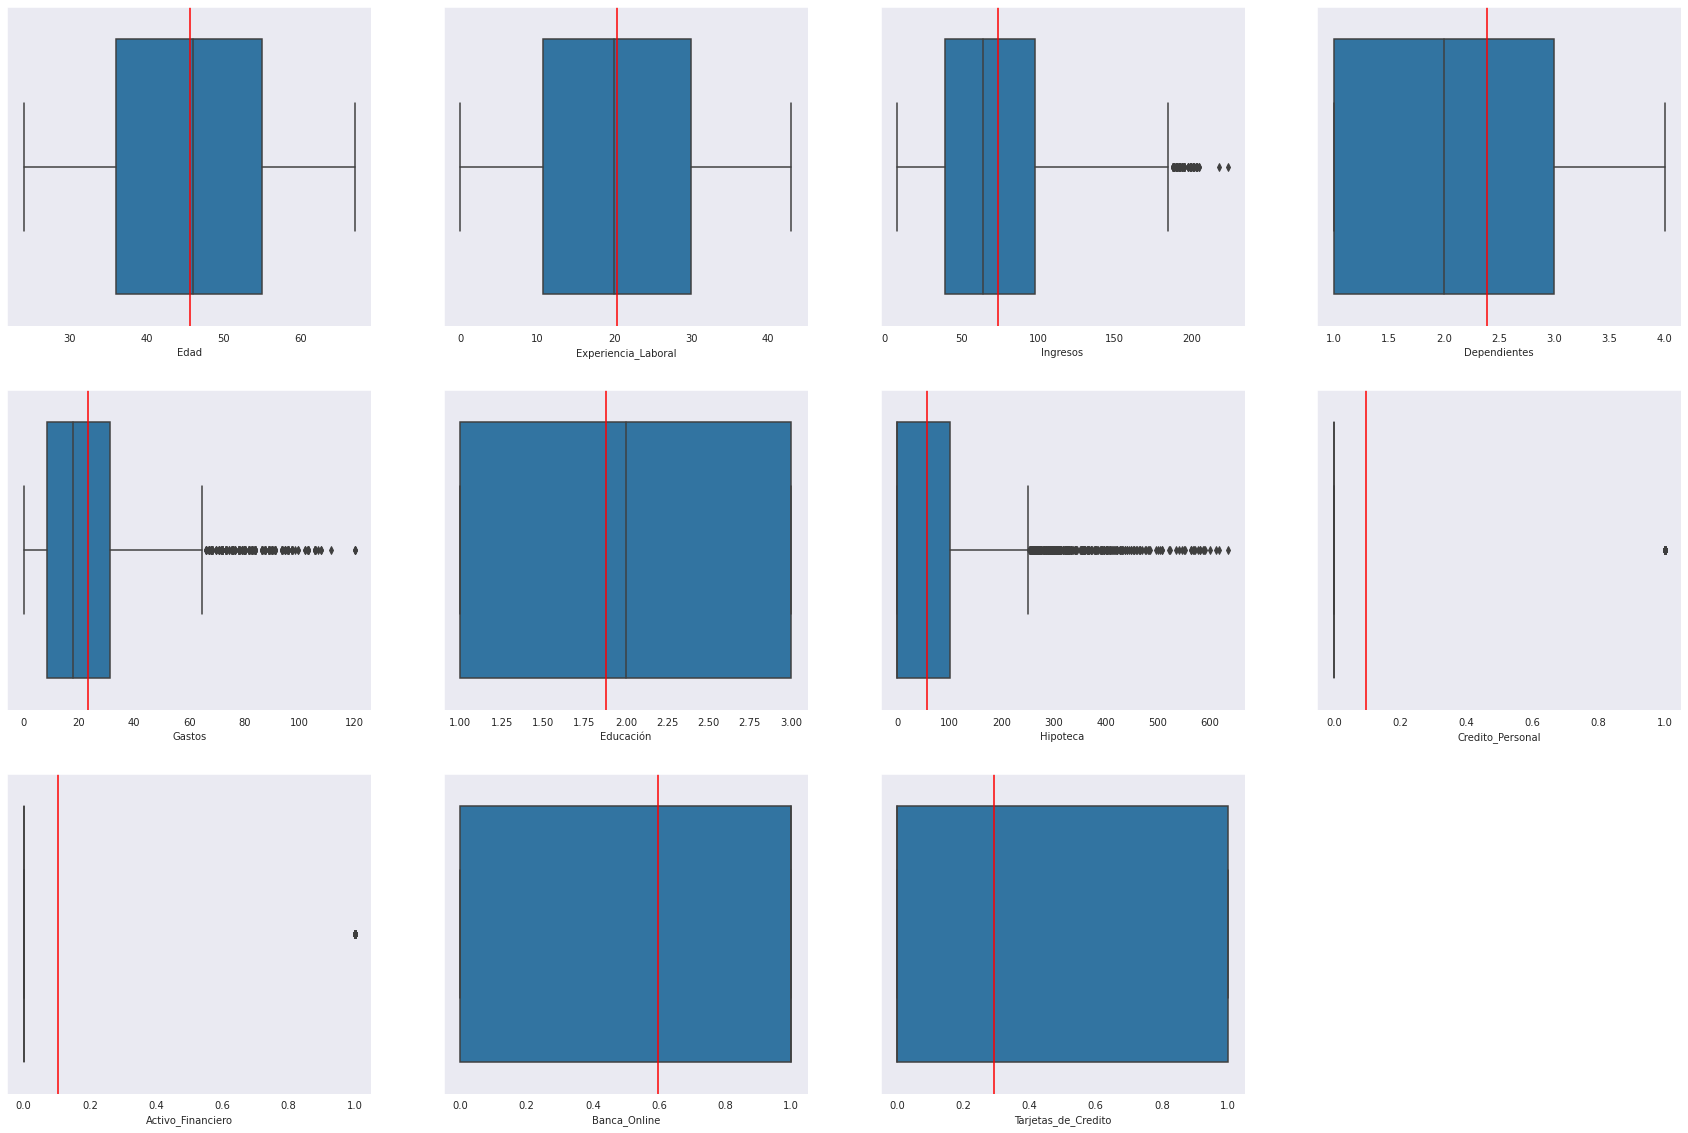

In [ ]:
plt.figure(figsize=(30,20))

plt.subplot(3,4,1)
sns.boxplot(x=df['Edad']);
plt.axvline(df['Edad'].mean(), c = 'r');

plt.subplot(3,4,2)
sns.boxplot(x=df['Experiencia_Laboral']);
plt.axvline(df['Experiencia_Laboral'].mean(), c = 'r');

plt.subplot(3,4,3)
sns.boxplot(x=df['Ingresos']);
plt.axvline(df['Ingresos'].mean(), c = 'r');

plt.subplot(3,4,4)
sns.boxplot(x=df['Dependientes']);
plt.axvline(df['Dependientes'].mean(), c = 'r');

plt.subplot(3,4,5)
sns.boxplot(x=df['Gastos']);
plt.axvline(df['Gastos'].mean(), c = 'r');

plt.subplot(3,4,6)
sns.boxplot(x=df['Educación']);
plt.axvline(df['Educación'].mean(), c = 'r');

plt.subplot(3,4,7)
sns.boxplot(x=df['Hipoteca']);
plt.axvline(df['Hipoteca'].mean(), c = 'r');

plt.subplot(3,4,8)
sns.boxplot(x=df['Credito_Personal']);
plt.axvline(df['Credito_Personal'].mean(), c = 'r');

plt.subplot(3,4,9)
sns.boxplot(x=df['Activo_Financiero']);
plt.axvline(df['Activo_Financiero'].mean(), c = 'r');

plt.subplot(3,4,10)
sns.boxplot(x=df['Banca_Online']);
plt.axvline(df['Banca_Online'].mean(), c = 'r');

plt.subplot(3,4,11)
sns.boxplot(x=df['Tarjetas_de_Credito']);
plt.axvline(df['Tarjetas_de_Credito'].mean(), c = 'r');

###Análisis de boxplot de nuestros datos

*   Edad: podemos ver que nuestros datos parecieran tener una distribución normal.
*   Experiencia_Laboral: Podemos ver que los datos también tiene una distribución parecida a la normal
*   Ingresos: Observamos que la distribución de los datos tiene un sesgo hacia la derecha con un poco outliers que se encuentran después del rango intercuartílico
*   Dependientes: Observamos que el 50% se encuentra entre 1 y 3 dependientes y la media se encuentra en 2.1 dependientes
*   Gastos: vemos que el 50% de nuestros datos se encuentran entre 8 y 31 mil dolares y tenemos unos cuantos datos atípicos
*   Educación: Vemos que la totalidad de nuestros datos se encuentre entre las tres categorías de datos 1, 2, 3
*   Valor de la Hipoteca: el 50 % de los datos se encuentra entre 0 y 101.0. En esta columna si vemos muchos mas datos atípicos
*   Crédito Personal: este dato es categórico al igual que Educación, pero en este vemos que la mayoría de los datos se encuentran en 0 y muy pocos se encuentran en 1 lo que indica que tenemos muy pocas personas aceptaron la promoción
*   Activo_Financiero: Este pareciera muy parecido al caso de cédito personal la mayoria de los clietnes no disponen de una cuenta de Activos Financieros
*   Banca Onlie: este dato también es categórico, pero vemos que los datos se encuentra más distribuidos entre los que usan la banca online y los que no la utilizan
*   Tarjetas_de_credito: por último, tenemos este otro dato categórico y observamos que también se distribuye más o menos de manera equitativa entre las personas que tiene tarjetas de crédito de otra institución bancaria y los que no 

## tablas de frecuencias

In [ ]:
edad = df['Edad']
segmento_e = pd.cut(edad,20)
df['Edad'].groupby(segmento_e).count()

Edad
(23.957, 26.15]    123
(26.15, 28.3]      193
(28.3, 30.45]      256
(30.45, 32.6]      245
(32.6, 34.75]      254
(34.75, 36.9]      258
(36.9, 39.05]      354
(39.05, 41.2]      261
(41.2, 43.35]      275
(43.35, 45.5]      248
(45.5, 47.65]      240
(47.65, 49.8]      233
(49.8, 51.95]      267
(51.95, 54.1]      400
(54.1, 56.25]      260
(56.25, 58.4]      275
(58.4, 60.55]      259
(60.55, 62.7]      245
(62.7, 64.85]      186
(64.85, 67.0]      116
Name: Edad, dtype: int64

Observamos que la mayoria de nuestros segmentos en la columna de Edad tiene mas o menos la misma cantidad de frecuencias y la cantidad de datos mas alta es de 52 años a 54 con 400 datos.

In [ ]:
experiencia = df['Experiencia_Laboral']
segmento_ex = pd.cut(experiencia,20)
df['Experiencia_Laboral'].groupby(segmento_ex).count()

Experiencia_Laboral
(-0.043, 2.15]    225
(2.15, 4.3]       242
(4.3, 6.45]       265
(6.45, 8.6]       240
(8.6, 10.75]      265
(10.75, 12.9]     218
(12.9, 15.05]     363
(15.05, 17.2]     252
(17.2, 19.35]     272
(19.35, 21.5]     261
(21.5, 23.65]     268
(23.65, 25.8]     273
(25.8, 27.95]     259
(27.95, 30.1]     388
(30.1, 32.25]     258
(32.25, 34.4]     242
(34.4, 36.55]     257
(36.55, 38.7]     204
(38.7, 40.85]     142
(40.85, 43.0]      54
Name: Experiencia_Laboral, dtype: int64

Observamos que la mayoria de nuestros segmentos creados para Experiencia Laboral tiene mas o menos la misma cantidad de frecuencias y la cantidad de datos mas alta en un segmento es de 28 años a 30 con 388 datos, y la menor frecuencia se encuentra en el segmento de 41 a 43

In [ ]:
ingresos = df['Ingresos']
segmento_in = pd.cut(ingresos,20)
df['Ingresos'].groupby(segmento_in).count()

Ingresos
(7.784, 18.8]     274
(18.8, 29.6]      522
(29.6, 40.4]      581
(40.4, 51.2]      556
(51.2, 62.0]      485
(62.0, 72.8]      376
(72.8, 83.6]      513
(83.6, 94.4]      355
(94.4, 105.2]     183
(105.2, 116.0]    188
(116.0, 126.8]    149
(126.8, 137.6]    155
(137.6, 148.4]    141
(148.4, 159.2]    123
(159.2, 170.0]     98
(170.0, 180.8]     99
(180.8, 191.6]     90
(191.6, 202.4]     51
(202.4, 213.2]      7
(213.2, 224.0]      2
Name: Ingresos, dtype: int64

En la tabla de frecuencia de ingresos podemos observar que despues de 159 Mil dolares de ingresos anuales la frecuencia de datos disminuye y en todo caso pudieramos considerar los últimos 9 datos como atípicos que es el segmento de 202 mil dolares anuales

In [ ]:
dependientes = df['Dependientes']
segmento_dp = pd.cut(dependientes,4)
df['Dependientes'].groupby(segmento_dp).count()

Dependientes
(0.997, 1.75]    1470
(1.75, 2.5]      1274
(2.5, 3.25]      1001
(3.25, 4.0]      1203
Name: Dependientes, dtype: int64

En el numero de dependientes observamos que las frecuencias de distribyen mas o menos con la misma cantidad de datos en cada segmento

In [ ]:
gastos_m = df['Gastos']
segmento_gt = pd.cut(gastos_m,20)
df['Gastos'].groupby(segmento_gt).count()

Gastos
(-0.12, 6.0]      1070
(6.0, 12.0]        830
(12.0, 18.0]       601
(18.0, 24.0]       713
(24.0, 30.0]       493
(30.0, 36.0]       397
(36.0, 42.0]       143
(42.0, 48.0]       156
(48.0, 54.0]       116
(54.0, 60.0]        88
(60.0, 66.0]        49
(66.0, 72.0]        56
(72.0, 78.0]        59
(78.0, 84.0]        60
(84.0, 90.0]        44
(90.0, 96.0]        34
(96.0, 102.0]       15
(102.0, 108.0]      20
(108.0, 114.0]       1
(114.0, 120.0]       3
Name: Gastos, dtype: int64

Nuestras frecuencias de datos mas importante se encuentra entre 0 y 31, el segmento con mas frecuencias acumuladas va de 0 a 6 mil dolares, el siguiente va de 18 a 24 mil dolares anuales y 12 a 18 mil dolares por ultimo tenemos el segmento de 24 a 30 mil dolares que concida mas o menos con los datos descritos en nuestros boxplots

In [ ]:
educacion = df['Educación']
segmento_ed = pd.cut(educacion,3)
df['Educación'].groupby(segmento_ed).count()

Educación
(0.998, 1.667]    2080
(1.667, 2.333]    1387
(2.333, 3.0]      1481
Name: Educación, dtype: int64

Vemos que la tabla de frecuencias de educacion nos permite ver que la mayoria de los datos se ubica en 0 a 1

In [ ]:
hipoteca = df['Hipoteca']
segmento_h = pd.cut(hipoteca,20)
df['Hipoteca'].groupby(segmento_h).count()

Hipoteca
(-0.635, 31.75]    3422
(31.75, 63.5]         0
(63.5, 95.25]       224
(95.25, 127.0]      345
(127.0, 158.75]     240
(158.75, 190.5]     179
(190.5, 222.25]     144
(222.25, 254.0]     107
(254.0, 285.75]      63
(285.75, 317.5]      61
(317.5, 349.25]      42
(349.25, 381.0]      32
(381.0, 412.75]      25
(412.75, 444.5]      20
(444.5, 476.25]      13
(476.25, 508.0]       8
(508.0, 539.75]       4
(539.75, 571.5]       9
(571.5, 603.25]       7
(603.25, 635.0]       3
Name: Hipoteca, dtype: int64

Pdemos observar que una gran cantidad de datos se encuentra entre 0 a 31 mil dolares como valor de la hipoteca, esto es dado que tenemos una gran cantidad de cleintes que no cuenta con una hipoteca

In [ ]:
credito = df['Credito_Personal']
segmento_cp = pd.cut(credito,2)
df['Credito_Personal'].groupby(segmento_cp).count()

Credito_Personal
(-0.001, 0.5]    4468
(0.5, 1.0]        480
Name: Credito_Personal, dtype: int64

Aqui los datos se tratan de variables categoricos por lo cual pudieramos verlo solo con dos segmentos como 0 y 1, esto nos permite ver que la mayoria de los datos se encuentra en 0 lo que nos permite ver que la mayoria de los clientes no acepto el credito personal en la primera promoción  

In [ ]:
a_financiero = df['Activo_Financiero']
segmento_af = pd.cut(a_financiero,2)
df['Activo_Financiero'].groupby(segmento_af).count()

Activo_Financiero
(-0.001, 0.5]    4432
(0.5, 1.0]        516
Name: Activo_Financiero, dtype: int64

Esta variable tambien es de tipo categorica por lo que vemos que la mayoria de las personas no tiene una cuenta de activos personales

In [ ]:
cuenta_a = df['Cuenta_de_Ahorros']
segmento_ca = pd.cut(cuenta_a,2)
df['Cuenta_de_Ahorros'].groupby(segmento_ca).count()

Cuenta_de_Ahorros
(-0.001, 0.5]    4646
(0.5, 1.0]        302
Name: Cuenta_de_Ahorros, dtype: int64

La variable categorica de cuenta de Ahorros en su tabla de frecuencia nos muestra que la mayoria de nuestros datos  

In [ ]:
online = df['Banca_Online']
segmento_bo = pd.cut(online,2)
df['Banca_Online'].groupby(segmento_bo).count()

Banca_Online
(-0.001, 0.5]    1994
(0.5, 1.0]       2954
Name: Banca_Online, dtype: int64

La tabla de frecuencia de la variable categorica de banca online nos muestra que la mayoria de clientes si cuentan con una cuenta de ahorros 

In [ ]:
tdc = df['Tarjetas_de_Credito']
segmento_tdc = pd.cut(tdc,2)
df['Tarjetas_de_Credito'].groupby(segmento_tdc).count()

Tarjetas_de_Credito
(-0.001, 0.5]    3493
(0.5, 1.0]       1455
Name: Tarjetas_de_Credito, dtype: int64

por ultimo nos analizamos la tabla de frecuencia de tarjetas de crédito nos muestra que la mayoria de las personas no cuenta con tarjeta de crédito de otra institución bancaria 

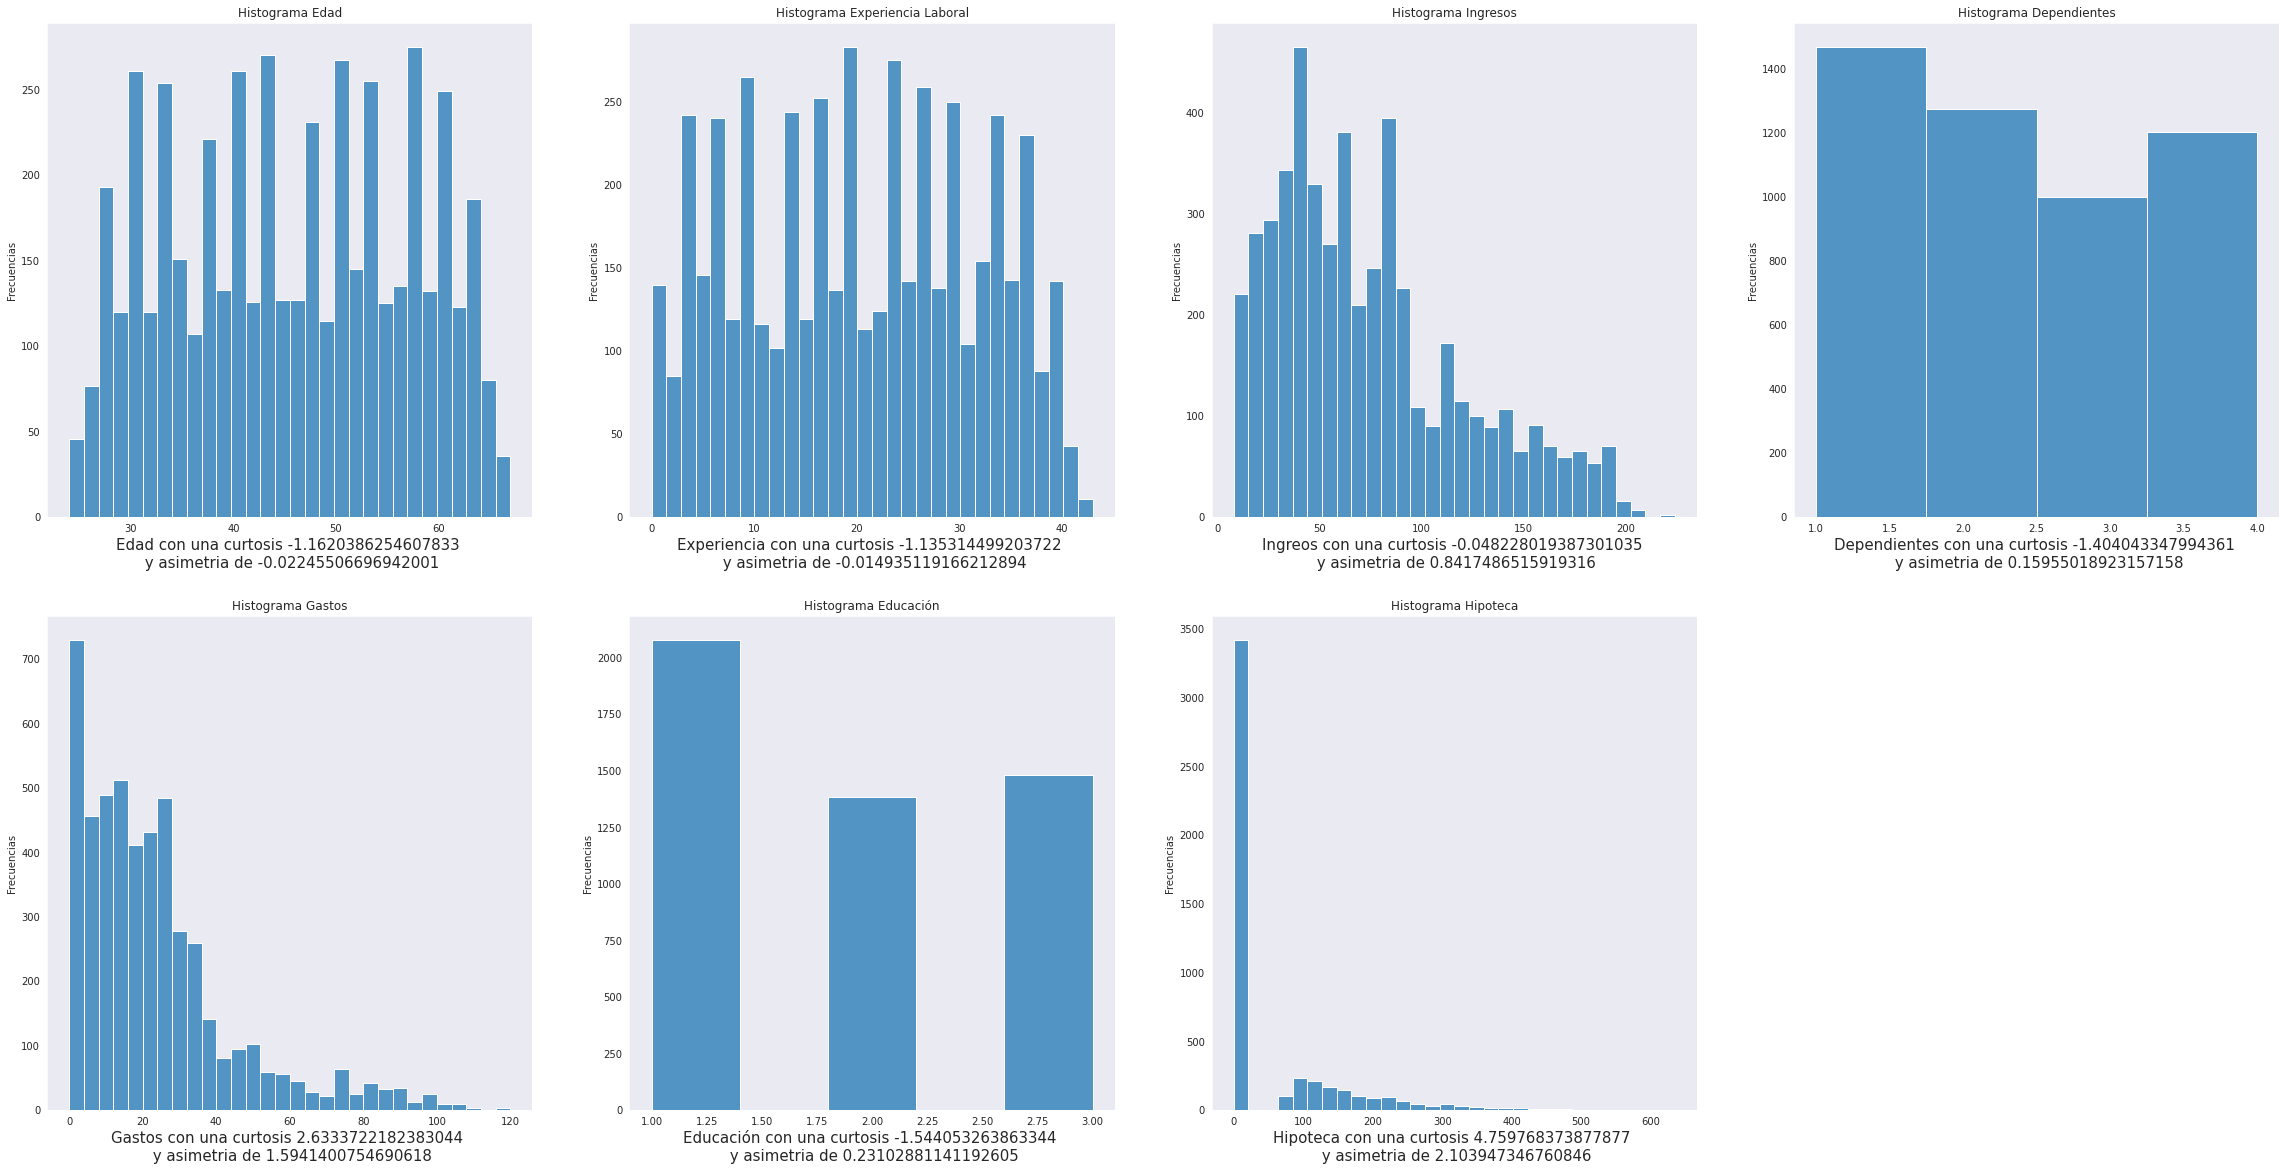

In [ ]:
plt.figure(figsize=(40,20))

plt.subplot(2,4,1)
axe = sns.histplot(df['Edad'], bins = 30)
axe.set(title = 'Histograma Edad', ylabel = 'Frecuencias' );
axe.set_xlabel(f'Edad con una curtosis {kurtosis(edad)} \n y asimetria de {skew(edad)}', fontsize = 15);

plt.subplot(2,4,2)
axel = sns.histplot(df['Experiencia_Laboral'], bins = 30)
axel.set(title = 'Histograma Experiencia Laboral', ylabel = 'Frecuencias');
axel.set_xlabel(f'Experiencia con una curtosis {kurtosis(experiencia)} \n y asimetria de {skew(experiencia)}', fontsize = 15);

plt.subplot(2,4,3)
axi = sns.histplot(df['Ingresos'], bins = 30)
axi.set(title = 'Histograma Ingresos', ylabel = 'Frecuencias');
axi.set_xlabel(f'Ingreos con una curtosis {kurtosis(ingresos)} \n y asimetria de {skew(ingresos)}', fontsize = 15);

plt.subplot(2,4,4)
axdp = sns.histplot(df['Dependientes'], bins = 4)
axdp.set(title = 'Histograma Dependientes', ylabel = 'Frecuencias');
axdp.set_xlabel(f'Dependientes con una curtosis {kurtosis(dependientes)} \n y asimetria de {skew(dependientes)}', fontsize = 15);

plt.subplot(2,4,5)
axg = sns.histplot(df['Gastos'], bins = 30)
axg.set(title = 'Histograma Gastos', ylabel = 'Frecuencias');
axg.set_xlabel(f'Gastos con una curtosis {kurtosis(gastos_m)} \n y asimetria de {skew(gastos_m)}', fontsize = 15);

plt.subplot(2,4,6)
axed = sns.histplot(df['Educación'], bins = 5)
axed.set(title = 'Histograma Educación', ylabel = 'Frecuencias');
axed.set_xlabel(f'Educación con una curtosis {kurtosis(educacion)} \n y asimetria de {skew(educacion)}', fontsize = 15);

plt.subplot(2,4,7)
axh = sns.histplot(df['Hipoteca'], bins = 30)
axh.set(title = 'Histograma Hipoteca', ylabel = 'Frecuencias');
axh.set_xlabel(f'Hipoteca con una curtosis {kurtosis(hipoteca)} \n y asimetria de {skew(hipoteca)}', fontsize = 15);

*   Edad: La medida de curtosis -1.1 nos indica que tenemos poca dispercion respecto de la media y que esta se encuentra mas escarpada, mientras que su medida de aismetria de - 0.02 nos ayuda a confirmar que la distribucion se aproxima a la normal.
*   Experiencia: Su cortosis de -1.1 nos permite saber que tenemos poca dispercion en los datos y su asimetria de -0.01 no perimite saber que se aproxima a la normal.
*   Ingresos: Tenemos una cortosis de -0.0  Nos indica que se aproxima a la normal y la asimetria 0.8 nos indica que tenemos un sesgo positivo con una cola larga hacia la derecha.
*   Dependientes: Este dato es categorico, aun asi vemos que la curtosis de -1.4 nos dice indica que nuestros datos estan mas escarpados con colas cortas y su asimetria de 0.1 nos indica que su simetria se asemeja mucho a la normal.
*   Gastos: tenemos una curtosis de 2.6 que nos indica mayor disperción de los datos y su asimetria de 1.5 nos confirma el sesgo positivo con la cola larga hacia la derecha.
*   Educación: tenemos una curtosis de -1.5 tien colas cortas claro que este dato es de tipo categorico, su simetria de 0.2 nos dice que su forma se aproxima a la normal.
*   Hipoteca: tenemos una curtosis de 4.7 lo cual nos dice que tenemos mucho mas dispercion en los datos y la asimetria nos demustra que tiene una asimetria positiva.

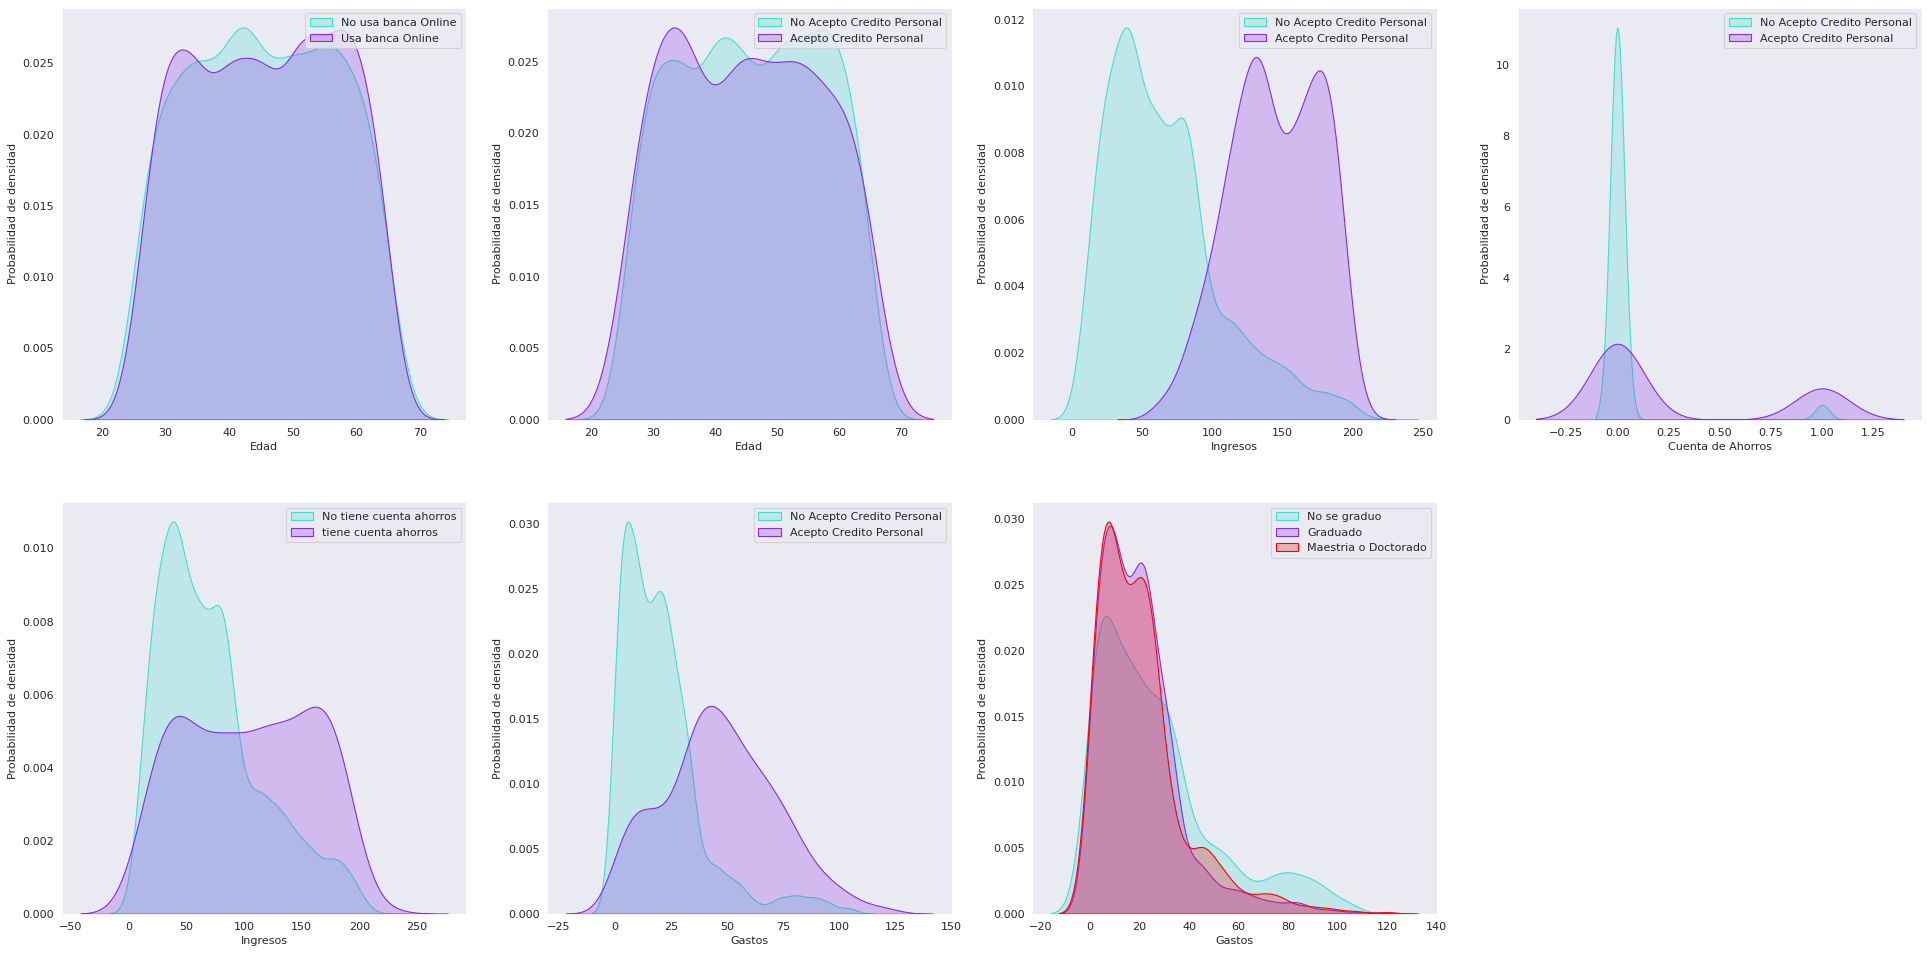

In [ ]:
fig = plt.figure(figsize = (30,15), dpi = 80)

plt.subplot(2,4,1)
densidad_e = sns.kdeplot(data = df.loc[(df['Banca_Online']== 0)], x = 'Edad', color='turquoise', shade=True, Label='No usa banca Online')
sns.kdeplot(data = df.loc[(df['Banca_Online']== 1)], x = 'Edad', color='blueviolet', shade=True, Label='Usa banca Online')
densidad_e.legend(loc = 'upper right');
plt.xlabel('Edad')
plt.ylabel('Probabilidad de densidad');

plt.subplot(2,4,2)
densidad_e = sns.kdeplot(data = df.loc[(df['Credito_Personal']== 0)], x = 'Edad', color='turquoise', shade=True, Label='No Acepto Credito Personal')
sns.kdeplot(data = df.loc[(df['Credito_Personal']== 1)], x = 'Edad', color='blueviolet', shade=True, Label='Acepto Credito Personal')
densidad_e.legend(loc = 'upper right');
plt.xlabel('Edad')
plt.ylabel('Probabilidad de densidad');

plt.subplot(2,4,3)
densidad_e = sns.kdeplot(data = df.loc[(df['Credito_Personal']== 0)], x = 'Ingresos', color='turquoise', shade=True, Label='No Acepto Credito Personal')
sns.kdeplot(data = df.loc[(df['Credito_Personal']== 1)], x = 'Ingresos', color='blueviolet', shade=True, Label='Acepto Credito Personal')
densidad_e.legend(loc = 'upper right');
plt.xlabel('Ingresos')
plt.ylabel('Probabilidad de densidad');

plt.subplot(2,4,4)
densidad_e = sns.kdeplot(data = df.loc[(df['Credito_Personal']== 0)], x = 'Cuenta_de_Ahorros', color='turquoise', shade=True, Label='No Acepto Credito Personal')
sns.kdeplot(data = df.loc[(df['Credito_Personal']== 1)], x = 'Cuenta_de_Ahorros', color='blueviolet', shade=True, Label='Acepto Credito Personal')
densidad_e.legend(loc = 'upper right');
plt.xlabel('Cuenta de Ahorros')
plt.ylabel('Probabilidad de densidad');

plt.subplot(2,4,5)
densidad_e = sns.kdeplot(data = df.loc[(df['Cuenta_de_Ahorros']== 0)], x = 'Ingresos', color='turquoise', shade=True, Label='No tiene cuenta ahorros')
sns.kdeplot(data = df.loc[(df['Cuenta_de_Ahorros']== 1)], x = 'Ingresos', color='blueviolet', shade=True, Label='tiene cuenta ahorros')
densidad_e.legend(loc = 'upper right');
plt.xlabel('Ingresos')
plt.ylabel('Probabilidad de densidad');

plt.subplot(2,4,6)
densidad_e = sns.kdeplot(data = df.loc[(df['Credito_Personal']== 0)], x = 'Gastos', color='turquoise', shade=True, Label='No Acepto Credito Personal')
sns.kdeplot(data = df.loc[(df['Credito_Personal']== 1)], x = 'Gastos', color='blueviolet', shade=True, Label='Acepto Credito Personal')
densidad_e.legend(loc = 'upper right');
plt.xlabel('Gastos')
plt.ylabel('Probabilidad de densidad');

plt.subplot(2,4,7)
densidad_e = sns.kdeplot(data = df.loc[(df['Educación']== 1)], x = 'Gastos', color='turquoise', shade=True, Label='No se graduo')
sns.kdeplot(data = df.loc[(df['Educación']== 2)], x = 'Gastos', color='blueviolet', shade=True, Label='Graduado')
sns.kdeplot(data = df.loc[(df['Educación']== 3)], x = 'Gastos', color='red', shade=True, Label='Maestria o Doctorado')
densidad_e.legend(loc = 'upper right');
plt.xlabel('Gastos')
plt.ylabel('Probabilidad de densidad');

*   Edad vs Banca Online: la probabilidad de que una persona use de cierta edad use la banca online o no la use es mas o menos la misma
*   Edad vs crédito personal: la probabilidad de que una persona de cierta edad tome el crédito tome el personal es la misma
*   Ingresos vs crédito personal: la probabilidad de que una persona de mayor ingreso tome el crédito personal es mayor mientras que hay mayor probabilidad de que las personas que tienen menor ingresos no tomen dicho credito
*   Cuenta de ahorros vs crédito personal: existe mayor probabilidad de que las personas que tomaron el crédito perosnal no tengan una cuenta ahorros
*   Ingresos vs Cuenta de Ahorros: podemos observar que a mayor ingreso tambien existe una mayor probabilidad de tener una cuenta de ahorros
*   Gastos vs crédito personal: podemos ver que las personas que tomaron el credito personal tiene una probabilida mayor de tener mas gastos sin embargo el dato tiene una media de 50 k
*   Gastos vs educación: se peude ver que la probabilidad de gastar mas por el grado de educación es mas o menos la misma. 

## Variables categóricas y violinplots

A continuación, se presenta un análisis gráfico de las variables categóricas disponibles en nuestro conjunto de datos.


In [ ]:
family_counts = df['Dependientes'].value_counts()
edu_counts = df['Educación'].value_counts()
loan_counts = df['Credito_Personal'].value_counts()
securitites_count = df['Activo_Financiero'].value_counts()
cd_counts = df['Cuenta_de_Ahorros'].value_counts()
online_counts = df['Banca_Online'].value_counts()


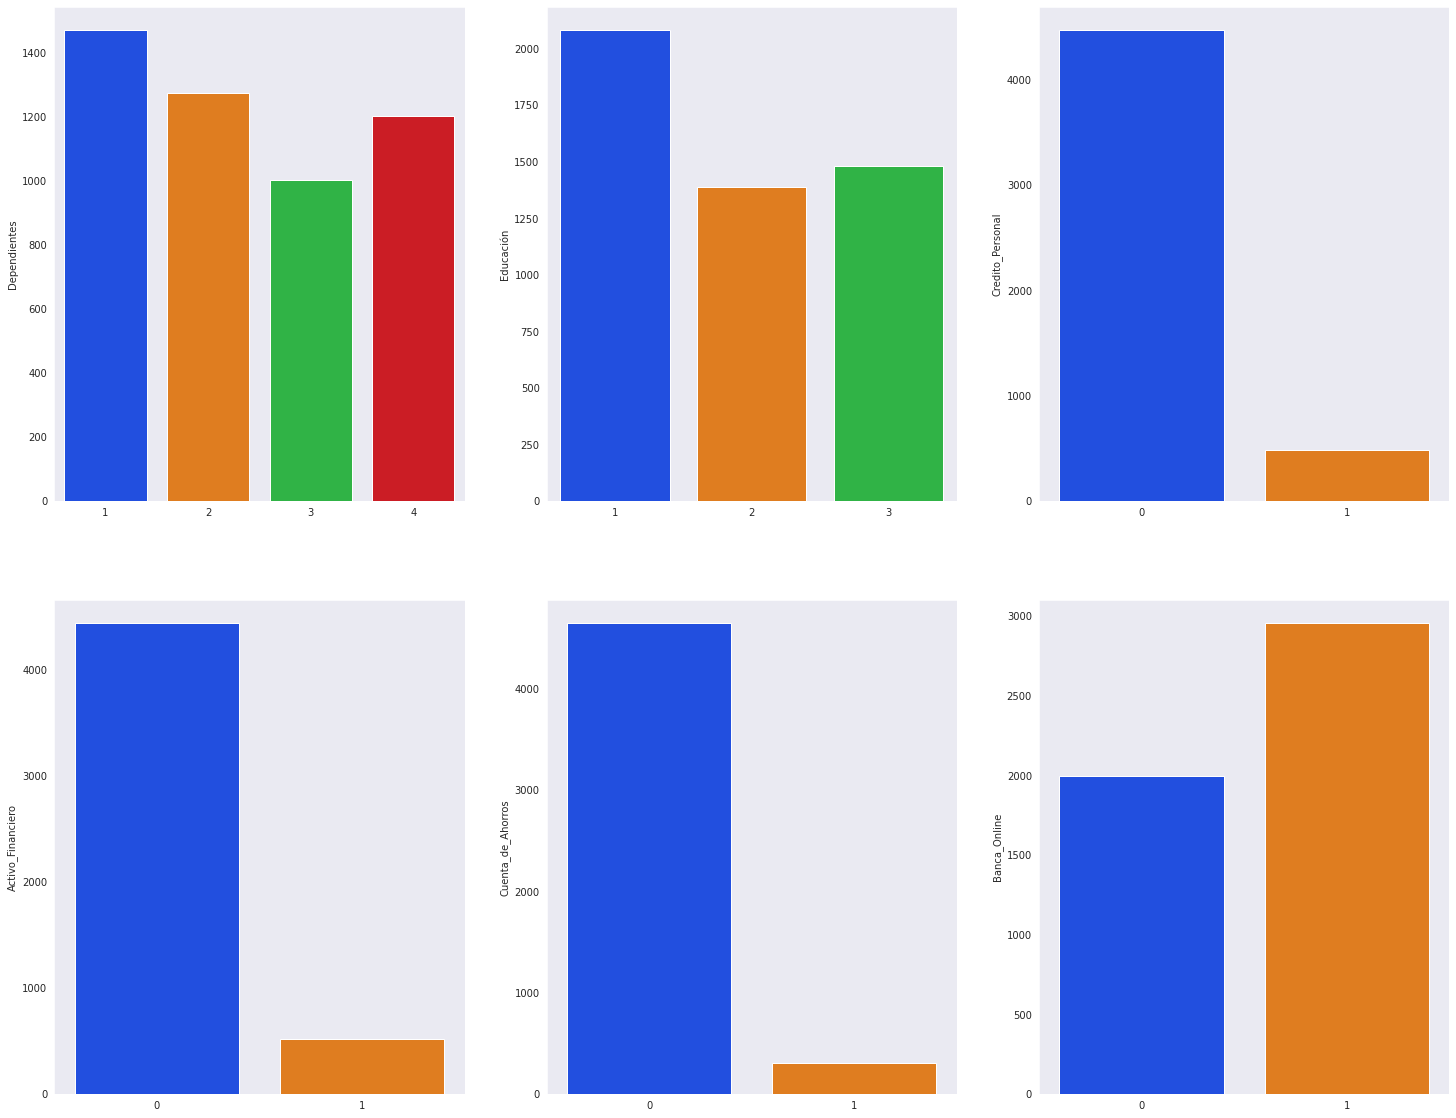

In [ ]:
plt.figure(figsize=(25,20))

plt.subplot(2, 3, 1)
sns.barplot(x = family_counts.index, y = family_counts, palette = 'bright')

plt.subplot(2, 3, 2)
sns.barplot(x = edu_counts.index, y = edu_counts, palette = 'bright')

plt.subplot(2, 3, 3)
sns.barplot(x = loan_counts.index, y = loan_counts, palette = 'bright') 

plt.subplot(2, 3, 4)
sns.barplot(x = securitites_count.index, y = securitites_count, palette = 'bright')

plt.subplot(2, 3, 5)
sns.barplot(x = cd_counts.index, y = cd_counts, palette = 'bright' )

plt.subplot(2, 3, 6)
ax = sns.barplot(x = online_counts.index, y = online_counts, palette = 'bright')

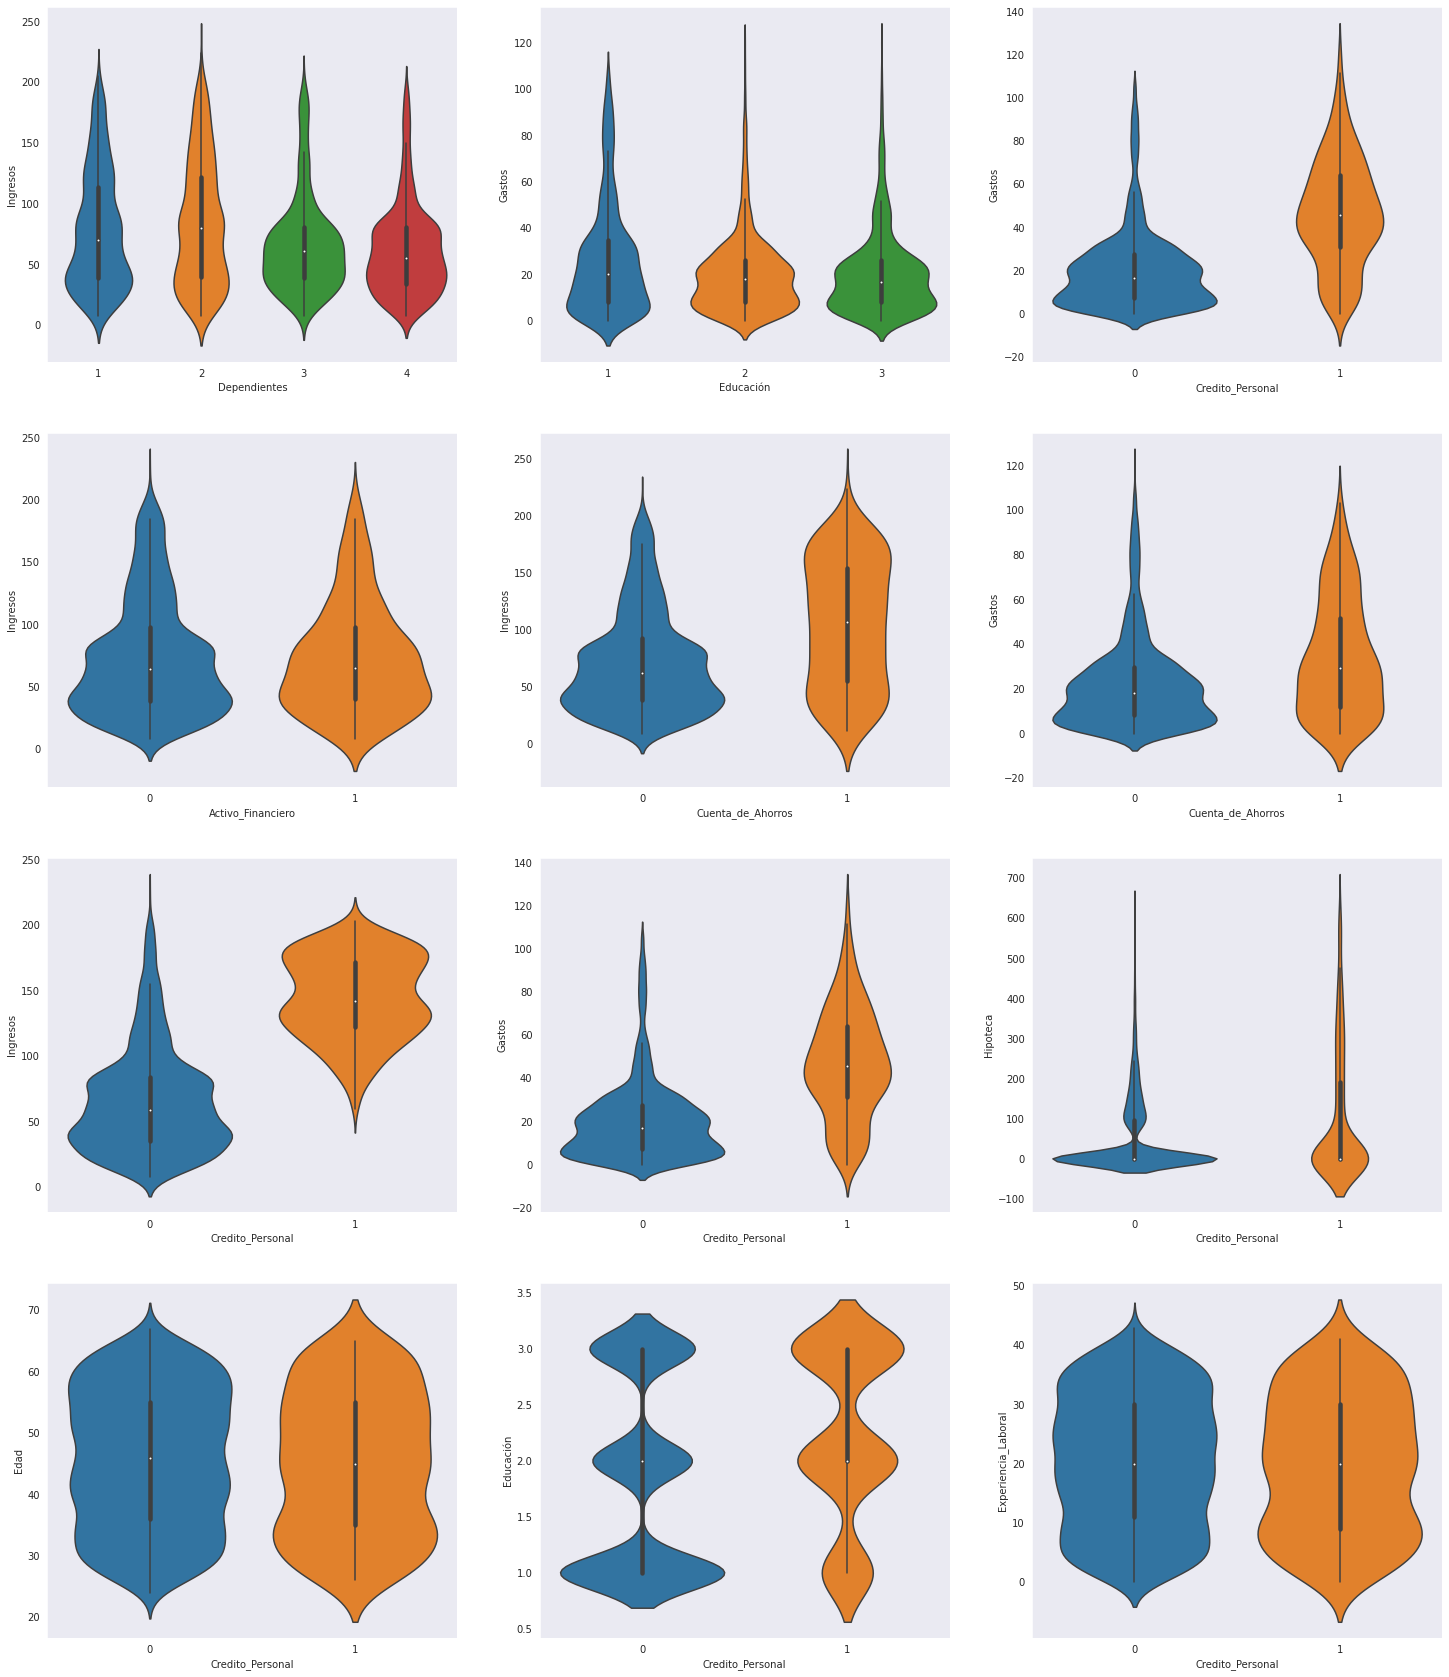

In [ ]:
plt.figure(figsize=(25,30))

plt.subplot(4, 3, 1)
sns.violinplot(x = df['Dependientes'], y = df['Ingresos']);

plt.subplot(4, 3, 2)
sns.violinplot(x = df['Educación'], y = df['Gastos']);

plt.subplot(4, 3, 3)
sns.violinplot(x = df['Credito_Personal'], y = df['Gastos']);

plt.subplot(4, 3, 4)
sns.violinplot(x = df['Activo_Financiero'], y = df['Ingresos']);

plt.subplot(4, 3, 5)
sns.violinplot(x = df['Cuenta_de_Ahorros'], y = df['Ingresos']);

plt.subplot(4, 3, 6)
sns.violinplot(x = df['Cuenta_de_Ahorros'], y = df['Gastos']);

plt.subplot(4, 3, 7)
sns.violinplot(y = df['Ingresos'], x = df['Credito_Personal']);

plt.subplot(4, 3, 8)
sns.violinplot(y = df['Gastos'], x = df['Credito_Personal']);

plt.subplot(4, 3, 9)
sns.violinplot(y = df['Hipoteca'], x = df['Credito_Personal']);

plt.subplot(4, 3, 10)
sns.violinplot(y = df['Edad'], x = df['Credito_Personal']);

plt.subplot(4, 3, 11)
sns.violinplot(y = df['Educación'], x = df['Credito_Personal']);

plt.subplot(4, 3, 12)
sns.violinplot(y = df['Experiencia_Laboral'], x = df['Credito_Personal']);

## Tablas de contingencia



In [ ]:
contingency_1  = pd.crosstab(df['Credito_Personal'], df['Educación'])

contingency_1

Educación            1     2     3
Credito_Personal                  
0                 1987  1205  1276
1                   93   182   205

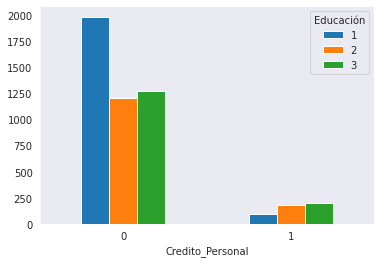

In [ ]:
contingency_1.plot.bar(rot=0)

In [ ]:
contingency_2 = pd.crosstab(df['Credito_Personal'], df['Dependientes'])

contingency_2

Dependientes         1     2    3     4
Credito_Personal                       
0                 1363  1168  868  1069
1                  107   106  133   134

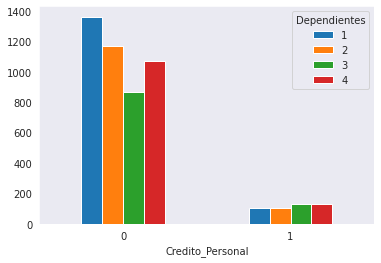

In [ ]:
contingency_2.plot.bar(rot = 0);

In [ ]:
contingency_3 = pd.crosstab(df['Credito_Personal'], [df['Activo_Financiero'], df['Cuenta_de_Ahorros'], df['Tarjetas_de_Credito']], margins = True, margins_name = 'Total')

contingency_3

Activo_Financiero       0                   1             Total
Cuenta_de_Ahorros       0         1         0       1          
Tarjetas_de_Credito     0     1   0    1    0   1   0   1      
Credito_Personal                                               
0                    2823  1123   0   66  318  42  15  81  4468
1                     281    50  13   76    9   0  34  17   480
Total                3104  1173  13  142  327  42  49  98  4948

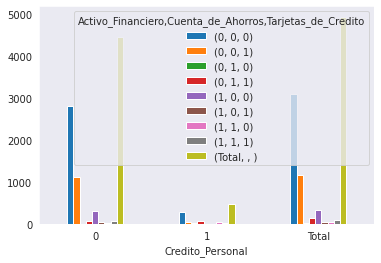

In [ ]:
contingency_3.plot.bar(rot = 0);

In [ ]:
contingency_4 = pd.crosstab(df['Credito_Personal'], df['Banca_Online'])

contingency_4

Banca_Online         0     1
Credito_Personal            
0                 1805  2663
1                  189   291

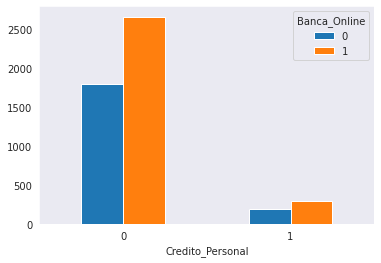

In [ ]:
contingency_4.plot.bar(rot = 0);

## Correlaciones

In [ ]:
matrix_correlation = df.corr()

matrix_correlation

ID      Edad  Experiencia_Laboral  Ingresos  \
ID                   1.000000 -0.009794            -0.009406 -0.017255   
Edad                -0.009794  1.000000             0.994101 -0.058006   
Experiencia_Laboral -0.009406  0.994101             1.000000 -0.049245   
Ingresos            -0.017255 -0.058006            -0.049245  1.000000   
Codigo_Postal        0.013516 -0.029325            -0.028564 -0.014958   
Dependientes        -0.016382 -0.039279            -0.045610 -0.155666   
Gastos              -0.025607 -0.050879            -0.048939  0.646178   
Educación            0.021902  0.046222             0.018243 -0.187992   
Hipoteca            -0.011172 -0.015184            -0.013459  0.206921   
Credito_Personal    -0.025124 -0.014204            -0.014121  0.504228   
Activo_Financiero   -0.018961  0.000496            -0.000457 -0.002327   
Cuenta_de_Ahorros   -0.007085  0.003261             0.005450  0.170171   
Banca_Online        -0.001508  0.013542             0.013518  0.014433   
Tarjetas_de_Credito  0.017294  0.007496             0.008876 -0.004493   

                     Codigo_Postal  Dependientes    Gastos  Educación  \
ID                        0.013516     -0.016382 -0.025607   0.021902   
Edad                     -0.029325     -0.039279 -0.050879   0.046222   
Experiencia_Laboral      -0.028564     -0.045610 -0.048939   0.018243   
Ingresos                 -0.014958     -0.155666  0.646178  -0.187992   
Codigo_Postal             1.000000      0.011109 -0.002703  -0.017391   
Dependientes              0.011109      1.000000 -0.107230   0.064032   
Gastos                   -0.002703     -0.107230  1.000000  -0.133939   
Educación                -0.017391      0.064032 -0.133939   1.000000   
Hipoteca                  0.008264     -0.020419  0.109905  -0.032559   
Credito_Personal          0.000251      0.063088  0.369388   0.138339   
Activo_Financiero         0.003555      0.020155  0.012477  -0.007508   
Cuenta_de_Ahorros         0.020149      0.015274  0.137587   0.014639   
Banca_Online              0.019155      0.008466 -0.003476  -0.013932   
Tarjetas_de_Credito       0.007355      0.012905 -0.007377  -0.012604   

                     Hipoteca  Credito_Personal  Activo_Financiero  \
ID                  -0.011172         -0.025124          -0.018961   
Edad                -0.015184         -0.014204           0.000496   
Experiencia_Laboral -0.013459         -0.014121          -0.000457   
Ingresos             0.206921          0.504228          -0.002327   
Codigo_Postal        0.008264          0.000251           0.003555   
Dependientes        -0.020419          0.063088           0.020155   
Gastos               0.109905          0.369388           0.012477   
Educación           -0.032559          0.138339          -0.007508   
Hipoteca             1.000000          0.142322          -0.003717   
Credito_Personal     0.142322          1.000000           0.022216   
Activo_Financiero   -0.003717          0.022216           1.000000   
Cuenta_de_Ahorros    0.089369          0.315769           0.319056   
Banca_Online        -0.006754          0.006175           0.016101   
Tarjetas_de_Credito -0.006910          0.002776          -0.017030   

                     Cuenta_de_Ahorros  Banca_Online  Tarjetas_de_Credito  
ID                           -0.007085     -0.001508             0.017294  
Edad                          0.003261      0.013542             0.007496  
Experiencia_Laboral           0.005450      0.013518             0.008876  
Ingresos                      0.170171      0.014433            -0.004493  
Codigo_Postal                 0.020149      0.019155             0.007355  
Dependientes                  0.015274      0.008466             0.012905  
Gastos                        0.137587     -0.003476            -0.007377  
Educación                     0.014639     -0.013932            -0.012604  
Hipoteca                      0.089369     -0.006754            -0.006910  
Credito_P

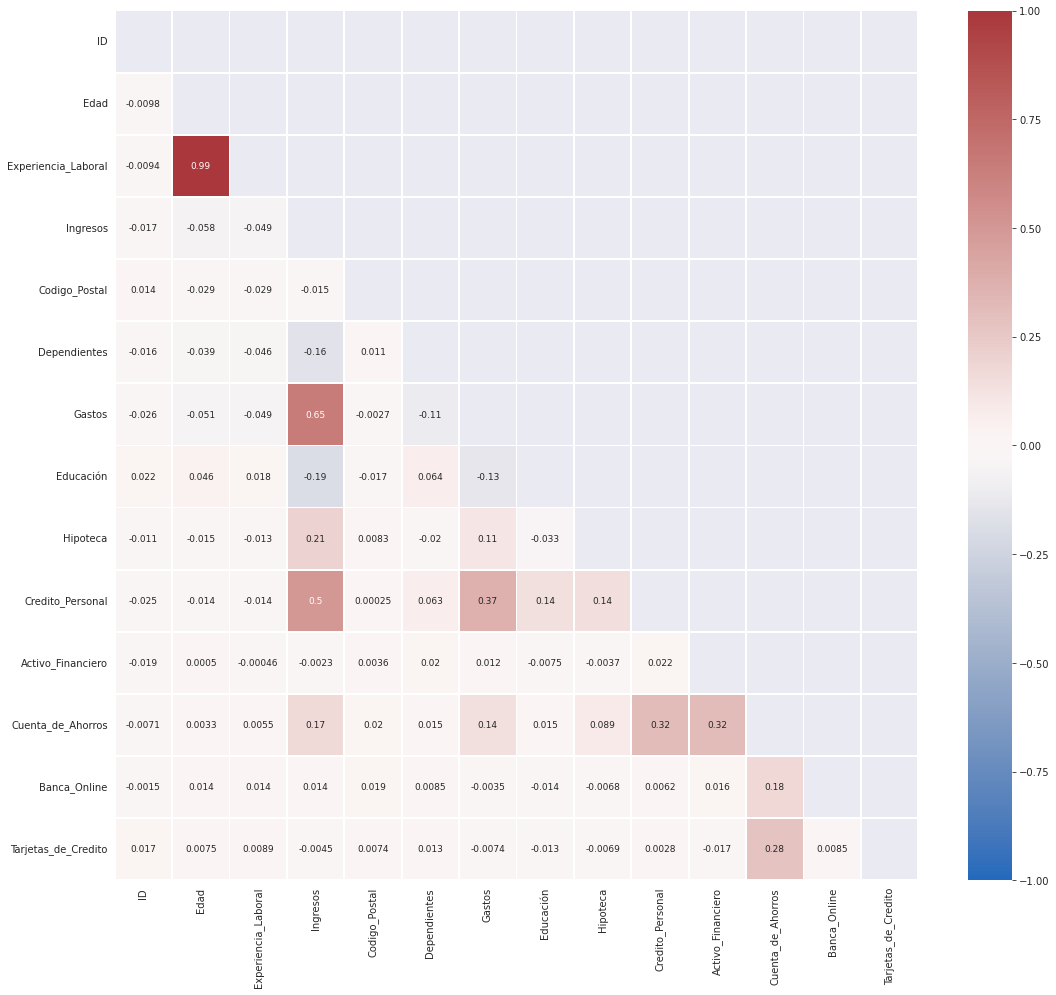

In [ ]:
fig = plt.figure(figsize = (18,16))

mask = np.triu(np.ones_like(matrix_correlation, dtype=bool))


ax = sns.heatmap(matrix_correlation, mask = mask, vmin = -1, vmax = 1, annot = True, cmap = 'vlag', lw = 0.8, annot_kws = {"size": 9})

# Correlaciones Importantes
*   Experiencia Laboral y edad  .99
*   Crédito Personal y Ingresos .50
*   Crédito Personal y Gastos   .37
*   Cuenta de Ahorros y Crédito Personal .32
*   Cuenta de Ahorros y Activo Financiero .32
*   Tarjetas de crédito y cuenta de ahorros .28
*   Hipoteca y Ingresos .21
*   Crédito personal y Educación .14
*   Crédito personal y Hipoteca .14 

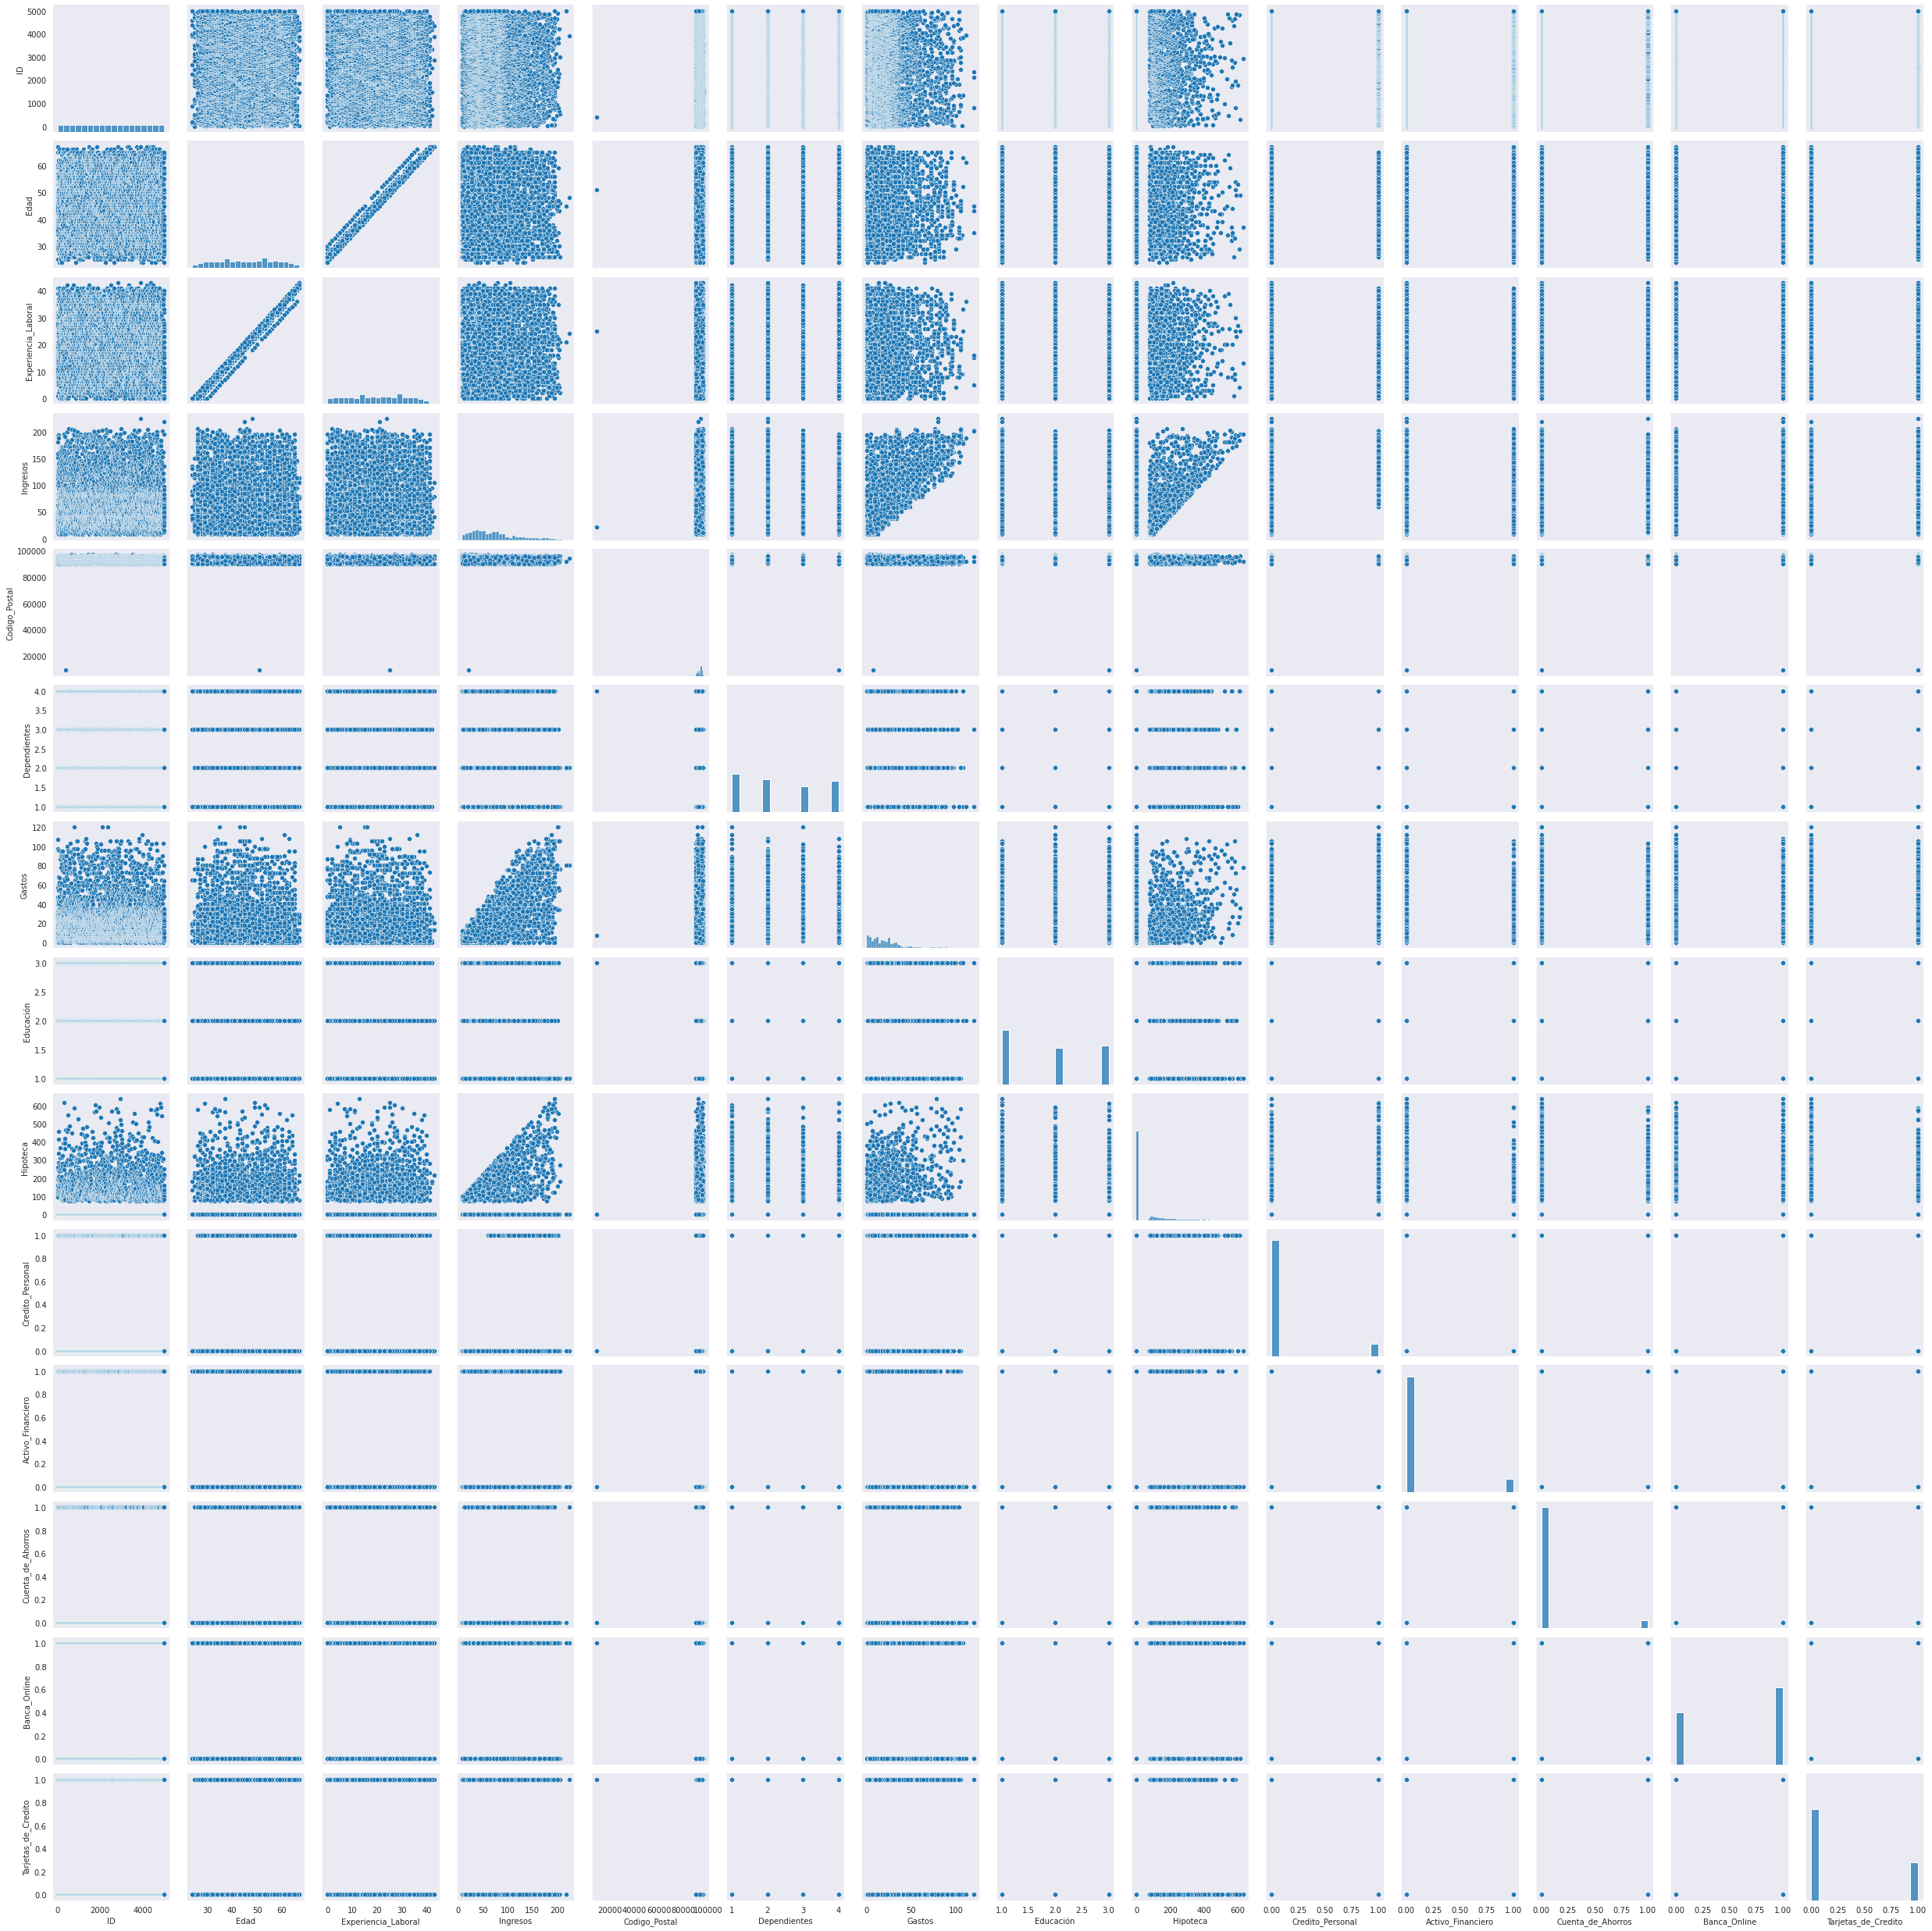

In [ ]:
sns.pairplot(df);

In [ ]:
def bootst(col):
  means = []
  for i in range(5000):
    sample = col.sample(n=1000, replace=True)
    means.append(sample.mean())
  series_means = pd.Series(means)
  lim_inf = series_means.quantile(0.025)
  lim_sup = series_means.quantile(0.975)
  print(f'Curtosis: {kurtosis(series_means)}')
  print(f'Asimetria: {skew(series_means)}')
  print(f'Error estándar: {series_means.std()}')
  print(f'Valor mínimo: {series_means.min()}')
  print(f'Valor máximo: {series_means.max()}')
  print(f'Rango: {series_means.max() - series_means.min()}')
  print(f'Intervalo de 95% confianza de la media: {lim_inf} < {series_means.mean()} < {lim_sup}')
  return series_means

##Edad

In [ ]:
means_edad = bootst(df['Edad'])

Curtosis: -0.03313185399673779
Asimetria: -0.018242293172499348
Error estándar: 0.3520676155047741
Valor mínimo: 44.237
Valor máximo: 46.807
Rango: 2.5700000000000003
Intervalo de 95% confianza de la media: 44.881975 < 45.565808600000004 < 46.254025


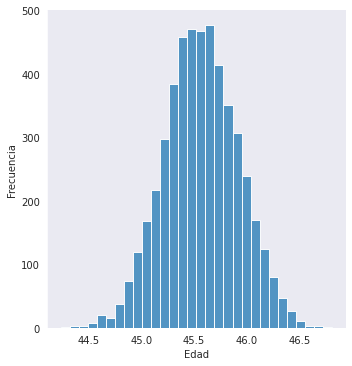

In [ ]:
p_edad = sns.displot(means_edad, kde = False, bins = 30)
p_edad.set_axis_labels("Edad", "Frecuencia");

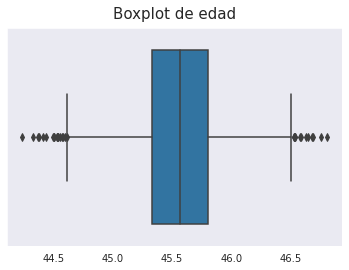

In [ ]:
b_edad = sns.boxplot(x=means_edad)
b_edad.set_title('Boxplot de edad', fontsize = 15, pad = 10);

##Experiencia laboral

In [ ]:
means_exp = bootst(df['Experiencia_Laboral'])

Curtosis: 0.0013648286259377862
Asimetria: -0.05457774063530233
Error estándar: 0.36429361530665155
Valor mínimo: 18.954
Valor máximo: 21.699
Rango: 2.745000000000001
Intervalo de 95% confianza de la media: 19.622925000000002 < 20.3282538 < 21.0201


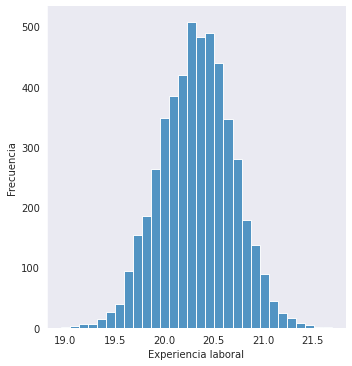

In [ ]:
p_exp = sns.displot(means_exp, kde = False, bins = 30)
p_exp.set_axis_labels("Experiencia laboral", "Frecuencia");

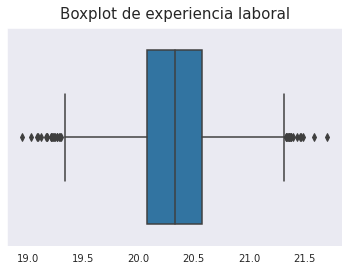

In [ ]:
b_exp = sns.boxplot(x=means_exp)
b_exp.set_title('Boxplot de experiencia laboral', fontsize = 15, pad = 10);

##Ingresos

In [ ]:
means_inc = bootst(df['Ingresos'])

Curtosis: -0.009709744180258273
Asimetria: 0.11356089298404164
Error estándar: 1.4578851470731196
Valor mínimo: 68.543
Valor máximo: 79.159
Rango: 10.616
Intervalo de 95% confianza de la media: 71.030725 < 73.79725800000001 < 76.70707499999999


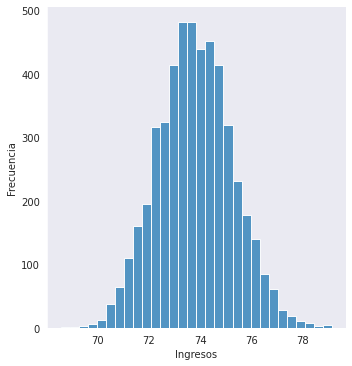

In [ ]:
p_inc = sns.displot(means_inc, kde = False, bins = 30)
p_inc.set_axis_labels("Ingresos", "Frecuencia");

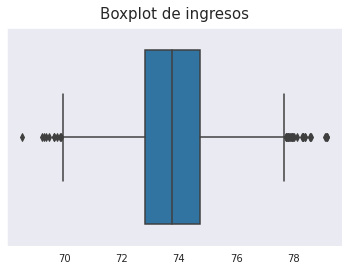

In [ ]:
b_inc = sns.boxplot(x=means_inc)
b_inc.set_title('Boxplot de ingresos', fontsize = 15, pad = 10);

##Código postal

In [ ]:
means_zip = bootst(df['Codigo_Postal'])

Curtosis: 0.23806214847163565
Asimetria: -0.29974208842196115
Error estándar: 66.68633635714082
Valor mínimo: 92862.868
Valor máximo: 93373.052
Rango: 510.18399999999383
Intervalo de 95% confianza de la media: 93014.323625 < 93152.5940814 < 93271.81125


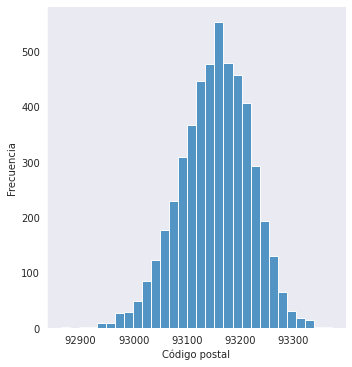

In [ ]:
p_zip = sns.displot(means_zip, kde = False, bins = 30)
p_zip.set_axis_labels("Código postal", "Frecuencia");

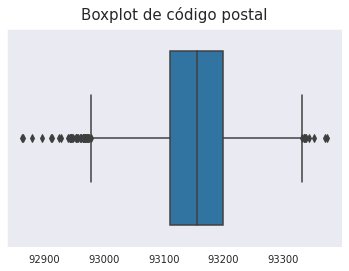

In [ ]:
b_zip = sns.boxplot(x=means_zip)
b_zip.set_title('Boxplot de código postal', fontsize = 15, pad = 10);

##Dependientes

In [ ]:
means_fam = bootst(df['Dependientes'])

Curtosis: -0.08173194700264519
Asimetria: 0.0478272630207545
Error estándar: 0.03628126452414653
Valor mínimo: 2.278
Valor máximo: 2.515
Rango: 0.2370000000000001
Intervalo de 95% confianza de la media: 2.321 < 2.3908084 < 2.462


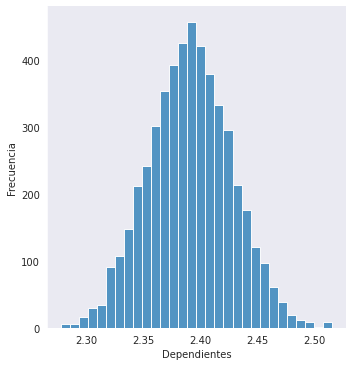

In [ ]:
p_fam = sns.displot(means_fam, kde = False, bins = 30)
p_fam.set_axis_labels("Dependientes", "Frecuencia");

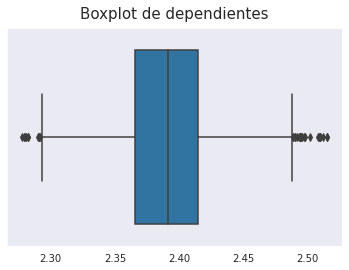

In [ ]:
b_fam = sns.boxplot(x=means_fam)
b_fam.set_title('Boxplot de dependientes', fontsize = 15, pad = 10);

##Gastos

In [ ]:
means_cc = bootst(df['Gastos'])

Curtosis: -0.060036869142779725
Asimetria: 0.0011797566849610526
Error estándar: 0.66723662266262
Valor mínimo: 20.9052
Valor máximo: 25.50636
Rango: 4.60116
Intervalo de 95% confianza de la media: 21.944049 < 23.231086031999997 < 24.531731999999998


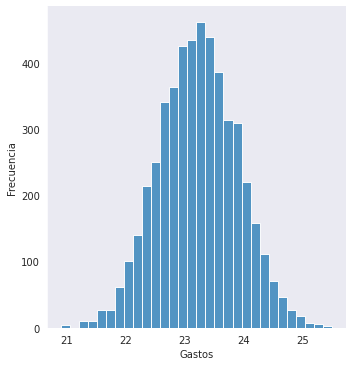

In [ ]:
p_cc = sns.displot(means_cc, kde = False, bins = 30)
p_cc.set_axis_labels("Gastos", "Frecuencia");

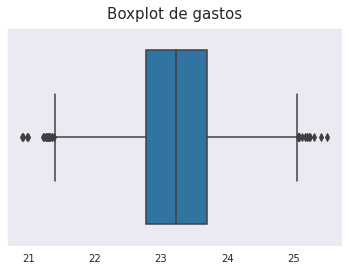

In [ ]:
b_cc = sns.boxplot(x=means_cc)
b_cc.set_title('Boxplot de gastos', fontsize = 15, pad = 10);

##Educación

In [ ]:
means_edu = bootst(df['Educación'])

Curtosis: -0.012502729490075914
Asimetria: -0.07381118590701471
Error estándar: 0.02642680445605845
Valor mínimo: 1.794
Valor máximo: 1.983
Rango: 0.18900000000000006
Intervalo de 95% confianza de la media: 1.827 < 1.8787987999999998 < 1.93


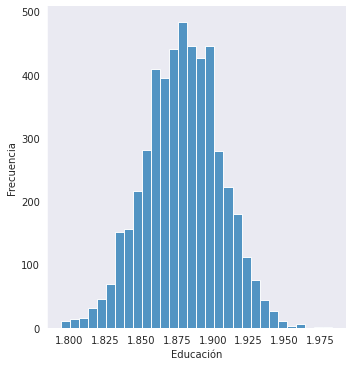

In [ ]:
p_edu = sns.displot(means_edu, kde = False, bins = 30)
p_edu.set_axis_labels("Educación", "Frecuencia");

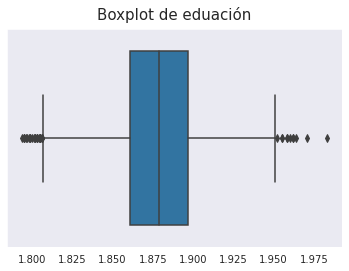

In [ ]:
b_edu = sns.boxplot(x=means_edu)
b_edu.set_title('Boxplot de eduación', fontsize = 15, pad = 10);

##Hipoteca

In [ ]:
means_hip = bootst(df['Hipoteca'])

Curtosis: 0.008467322243278286
Asimetria: 0.0438770879536471
Error estándar: 3.2490725229455917
Valor mínimo: 44.413
Valor máximo: 68.088
Rango: 23.674999999999997
Intervalo de 95% confianza de la media: 50.422775 < 56.590607199999994 < 63.013025


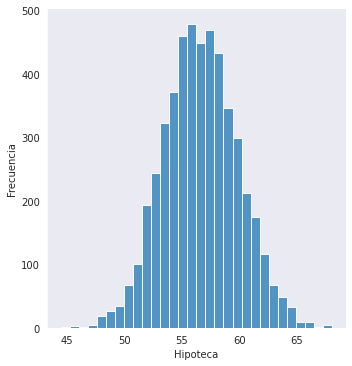

In [ ]:
p_hip = sns.displot(means_hip, kde = False, bins = 30)
p_hip.set_axis_labels("Hipoteca", "Frecuencia");

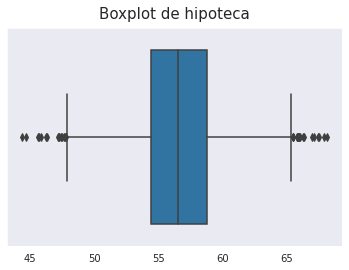

In [ ]:
b_hip = sns.boxplot(x=means_hip)
b_hip.set_title('Boxplot de hipoteca', fontsize = 15, pad = 10);

#Visualización de datos avanzada

##Relación entre gastos e ingresos

###Gráfico de dispersión

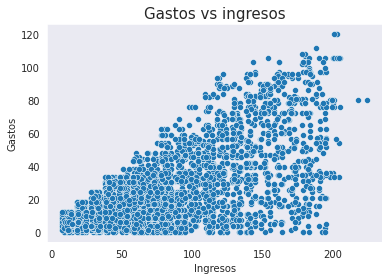

In [ ]:
vis_0 = sns.scatterplot(x=df['Ingresos'], y=df['Gastos'])
vis_0.set_title('Gastos vs ingresos', fontsize=15);

###Binning hexagonal

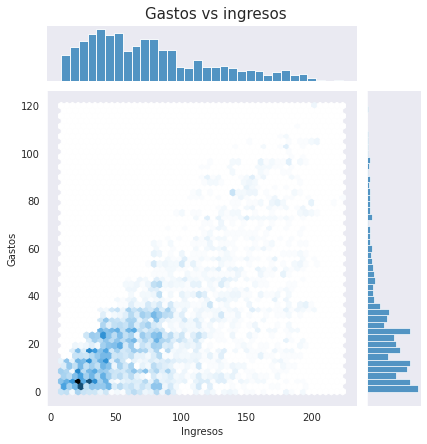

In [ ]:
vis_1 = sns.jointplot(x='Ingresos', y='Gastos', data=df, kind='hex', ratio=5, joint_kws={'gridsize': 50})
vis_1.fig.suptitle('Gastos vs ingresos', fontsize=15, y=1.02);

###Gráfico de dispersión segmentado por crédito personal

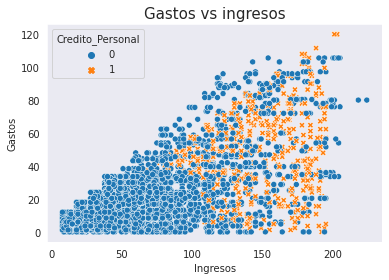

In [ ]:
vis_2 = sns.scatterplot(x=df['Ingresos'], y=df['Gastos'],\
                hue=df['Credito_Personal'], style=df['Credito_Personal'])
vis_2.set_title('Gastos vs ingresos', fontsize=15);

###Gráfico de dispersión con crédito personal como variable condicionante

In [ ]:
df_2 = df[['Credito_Personal', 'Ingresos', 'Gastos']]

In [ ]:
cero = df_2[df_2['Credito_Personal'] == 0]
uno = df_2[df_2['Credito_Personal'] == 1]

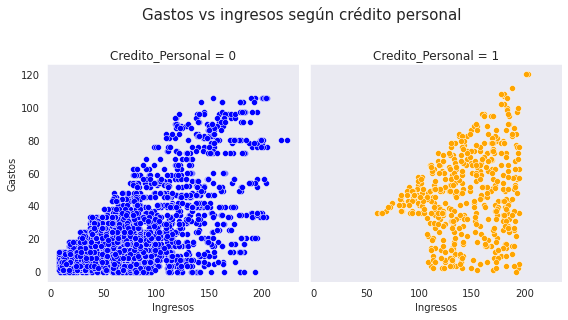

In [ ]:
paleta = ["blue","orange"]

vis_3 = plt.figure(figsize=(8, 4))
ejes = vis_3.subplots(1, 2, sharex=True, sharey=True)

sns.scatterplot(x=cero['Ingresos'], y=cero['Gastos'], ax=ejes[0], color=paleta[0])
sns.scatterplot(x=uno['Ingresos'], y=uno['Gastos'], ax=ejes[1], color=paleta[1]);

ejes[0].set_title('Credito_Personal = 0')
ejes[1].set_title('Credito_Personal = 1')

vis_3.suptitle('Gastos vs ingresos según crédito personal', fontsize=15, x=0.53, y=1.1)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

###Gráfica de barras apiladas

In [ ]:
copy_df = df.copy()

In [ ]:
def num_to_cat(col):
    if col == 0:
        return "No"
    else:
        return "Sí"

In [ ]:
copy_df['Tarjeta de crédito'] = copy_df['Tarjetas_de_Credito']
copy_df['Tarjeta de crédito'] = copy_df['Tarjeta de crédito'].map(num_to_cat)

In [ ]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4948 non-null   int64  
 1   Edad                 4948 non-null   int64  
 2   Experiencia_Laboral  4948 non-null   int64  
 3   Ingresos             4948 non-null   int64  
 4   Codigo_Postal        4948 non-null   int64  
 5   Dependientes         4948 non-null   int64  
 6   Gastos               4948 non-null   float64
 7   Educación            4948 non-null   int64  
 8   Hipoteca             4948 non-null   int64  
 9   Credito_Personal     4948 non-null   int64  
 10  Activo_Financiero    4948 non-null   int64  
 11  Cuenta_de_Ahorros    4948 non-null   int64  
 12  Banca_Online         4948 non-null   int64  
 13  Tarjetas_de_Credito  4948 non-null   int64  
 14  Tarjeta de crédito   4948 non-null   object 
dtypes: float64(1), int64(13), object(1)
me

In [ ]:
copy_df['count'] = 1
value_counts = copy_df.groupby(['Tarjeta de crédito', 'Credito_Personal'])['count'].sum()
value_counts = value_counts.unstack(1)
value_counts = value_counts.fillna(0)
value_counts

Credito_Personal       0    1
Tarjeta de crédito           
No                  3156  337
Sí                  1312  143

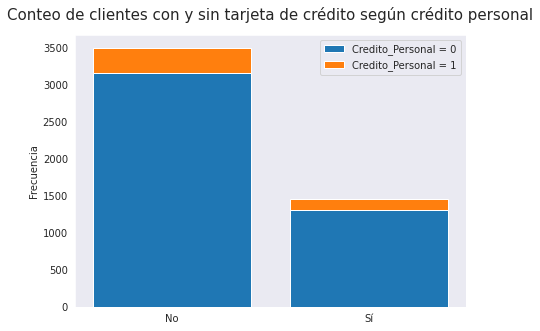

In [ ]:
vis_3_1 = plt.figure(figsize=(7, 5))
ax = vis_3_1.add_subplot()

plt1 = ax.bar(value_counts.index, value_counts[0], label='0')
plt2 = ax.bar(value_counts.index, value_counts[1], bottom=value_counts[0])

ax.set_ylabel('Frecuencia')
ax.set_title('Conteo de clientes con y sin tarjeta de crédito según crédito personal', fontsize=15, pad=15);
plt.legend((plt1[0], plt2[0]), ('Credito_Personal = 0', 'Credito_Personal = 1'));

###Gráfico de dispersión segmentado por activo financiero

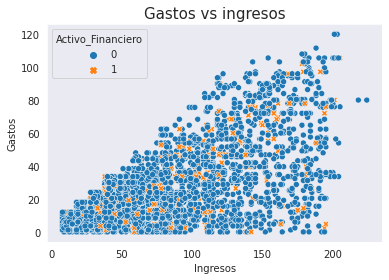

In [ ]:
vis_4 = sns.scatterplot(x=copy_df['Ingresos'], y=copy_df['Gastos'],\
                hue=copy_df['Activo_Financiero'], style=copy_df['Activo_Financiero'])
vis_4.set_title('Gastos vs ingresos', fontsize=15);

###Gráfico de dispersión segmentado por dependientes

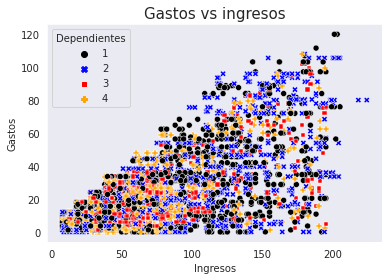

In [ ]:
paleta = ["black", "blue", "red", "orange"]
vis_5 = sns.scatterplot(x=copy_df['Ingresos'], y=copy_df['Gastos'],\
                hue=copy_df['Dependientes'], style=copy_df['Dependientes'], palette=paleta)
vis_5.set_title('Gastos vs ingresos', fontsize=15);

###Gráfico de dispersión con dependientes como variable condicionante

In [ ]:
df_2_1 = copy_df[['Dependientes', 'Ingresos', 'Gastos']]

In [ ]:
uno = df_2_1[df_2_1['Dependientes'] == 1]
dos = df_2_1[df_2_1['Dependientes'] == 2]
tres = df_2_1[df_2_1['Dependientes'] == 3]
cuatro = df_2_1[df_2_1['Dependientes'] == 4]

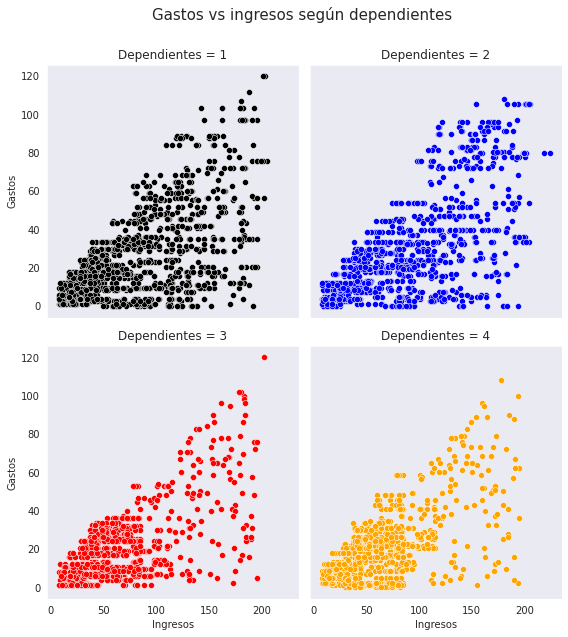

In [ ]:
paleta = ["black", "blue", "red", "orange"]

vis_5_1 = plt.figure(figsize=(8, 8))
ejes = vis_5_1.subplots(2, 2, sharex=True, sharey=True)

sns.scatterplot(x=uno['Ingresos'], y=uno['Gastos'], ax=ejes[0,0], color=paleta[0])
sns.scatterplot(x=dos['Ingresos'], y=dos['Gastos'], ax=ejes[0,1], color=paleta[1])
sns.scatterplot(x=tres['Ingresos'], y=tres['Gastos'], ax=ejes[1,0], color=paleta[2])
sns.scatterplot(x=cuatro['Ingresos'], y=cuatro['Gastos'], ax=ejes[1,1], color=paleta[3]);

ejes[0,0].set_title('Dependientes = 1')
ejes[0,1].set_title('Dependientes = 2')
ejes[1,0].set_title('Dependientes = 3')
ejes[1,1].set_title('Dependientes = 4')

vis_5_1.suptitle('Gastos vs ingresos según dependientes', fontsize=15, x=0.53, y=1.1)

plt.tight_layout()
plt.subplots_adjust(top=1)

###Gráfico de dispersión segmentado por educación

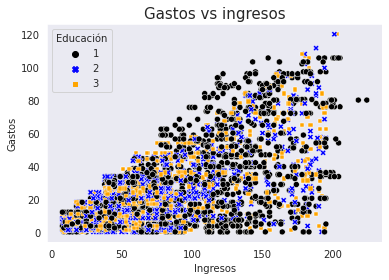

In [ ]:
paleta = ["black", "blue", "orange"]
vis_6 = sns.scatterplot(x=copy_df['Ingresos'], y=copy_df['Gastos'],\
                hue=copy_df['Educación'], style=copy_df['Educación'], palette=paleta)
vis_6.set_title('Gastos vs ingresos', fontsize=15);

###Gráfico de dispersión con educación como variable condicionante

In [ ]:
df_3_1 = copy_df[['Educación', 'Ingresos', 'Gastos']]

In [ ]:
uno = df_3_1[df_3_1['Educación'] == 1]
dos = df_3_1[df_3_1['Educación'] == 2]
tres = df_3_1[df_3_1['Educación'] == 3]

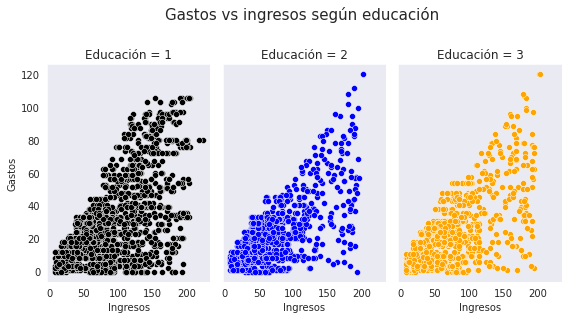

In [ ]:
paleta = ["black", "blue", "orange"]

vis_6_1 = plt.figure(figsize=(8, 4))
ejes = vis_6_1.subplots(1, 3, sharex=True, sharey=True)

sns.scatterplot(x=uno['Ingresos'], y=uno['Gastos'], ax=ejes[0], color=paleta[0])
sns.scatterplot(x=dos['Ingresos'], y=dos['Gastos'], ax=ejes[1], color=paleta[1])
sns.scatterplot(x=tres['Ingresos'], y=tres['Gastos'], ax=ejes[2], color=paleta[2])

ejes[0].set_title('Educación = 1')
ejes[1].set_title('Educación = 2')
ejes[2].set_title('Educación = 3')

vis_6_1.suptitle('Gastos vs ingresos según educación', fontsize=15, x=0.53, y=1.1)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

###Gráfico de dispersión segmentado por banca online

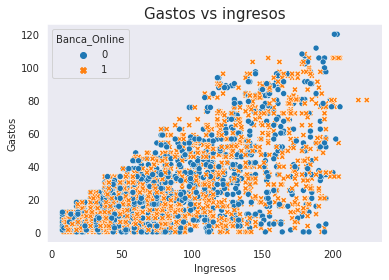

In [ ]:
vis_7 = sns.scatterplot(x=copy_df['Ingresos'], y=copy_df['Gastos'],\
                hue=copy_df['Banca_Online'], style=copy_df['Banca_Online'])
vis_7.set_title('Gastos vs ingresos', fontsize=15);

###Gráfico de dispersión segmentado por tarjetas de crédito

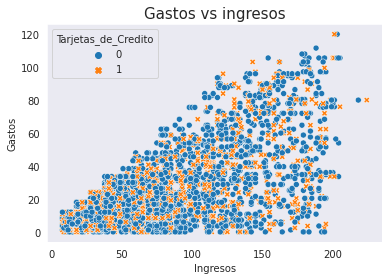

In [ ]:
vis_8 = sns.scatterplot(x=copy_df['Ingresos'], y=copy_df['Gastos'],\
                hue=copy_df['Tarjetas_de_Credito'], style=copy_df['Tarjetas_de_Credito'])
vis_8.set_title('Gastos vs ingresos', fontsize=15);

##Relación entre edad y gastos

###Gráfico de dispersión

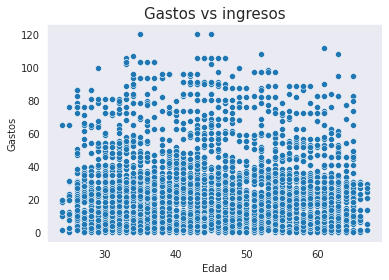

In [ ]:
vis_9 = sns.scatterplot(x=copy_df['Edad'], y=copy_df['Gastos'])
vis_9.set_title('Gastos vs ingresos', fontsize=15);

###Gráfico de dispersión segmentado por crédito personal

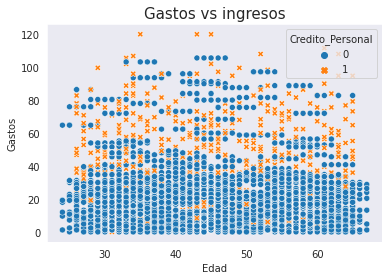

In [ ]:
vis_10 = sns.scatterplot(x=copy_df['Edad'], y=copy_df['Gastos'],\
                hue=copy_df['Credito_Personal'], style=copy_df['Credito_Personal'])
vis_10.set_title('Gastos vs ingresos', fontsize=15);

###Gráfico de dispersión con variable condicionante

In [ ]:
df_3 = copy_df[['Credito_Personal', 'Edad', 'Gastos']]

In [ ]:
cero = df_3[df_3['Credito_Personal'] == 0]
uno = df_3[df_3['Credito_Personal'] == 1]

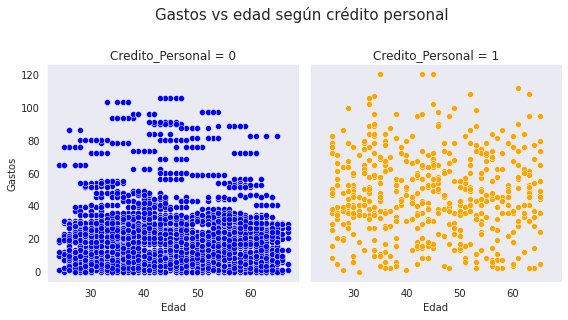

In [ ]:
paleta = ["blue","orange"]

vis_11 = plt.figure(figsize=(8, 4))
ejes = vis_11.subplots(1, 2, sharex=True, sharey=True)

sns.scatterplot(x=cero['Edad'], y=cero['Gastos'], ax=ejes[0], color=paleta[0])
sns.scatterplot(x=uno['Edad'], y=uno['Gastos'], ax=ejes[1], color=paleta[1]);

ejes[0].set_title('Credito_Personal = 0')
ejes[1].set_title('Credito_Personal = 1')

vis_11.suptitle('Gastos vs edad según crédito personal', fontsize=15, x=0.53, y=1.1)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

##Relación entre ingresos e hipoteca

###Gráfico de dispersión

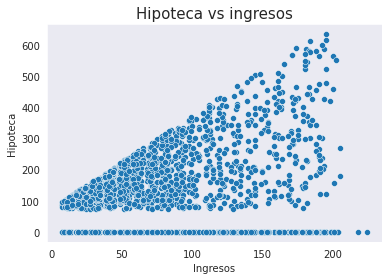

In [ ]:
vis_12 = sns.scatterplot(x=copy_df['Ingresos'], y=copy_df['Hipoteca'])
vis_12.set_title('Hipoteca vs ingresos', fontsize=15);

###Binning hexagonal

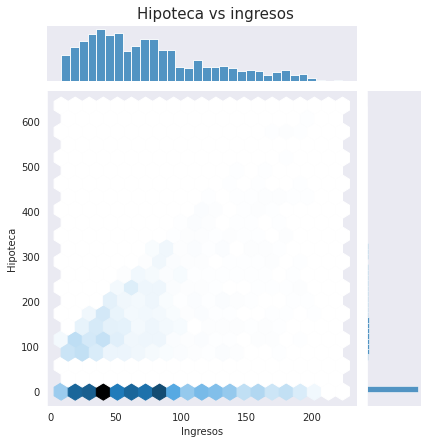

In [ ]:
vis_13 = sns.jointplot(x='Ingresos', y='Hipoteca', data=df, kind='hex', ratio=5, joint_kws={'gridsize': 20})
vis_13.fig.suptitle('Hipoteca vs ingresos', fontsize=15, y=1.02);

###Gráfico de dispersión segmentado por crédito personal

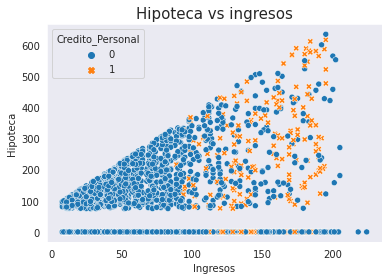

In [ ]:
vis_14 = sns.scatterplot(x=copy_df['Ingresos'], y=copy_df['Hipoteca'],\
                hue=copy_df['Credito_Personal'], style=copy_df['Credito_Personal'])
vis_14.set_title('Hipoteca vs ingresos', fontsize=15);

###Gráfico de dispersión con crédito personal como variable condicionante

In [ ]:
df_4 = copy_df[['Credito_Personal', 'Ingresos', 'Hipoteca']]

In [ ]:
cero = df_4[df_4['Credito_Personal'] == 0]
uno = df_4[df_4['Credito_Personal'] == 1]

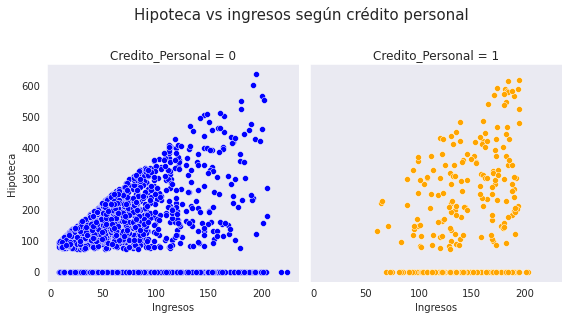

In [ ]:
paleta = ["blue","orange"]

vis_15 = plt.figure(figsize=(8, 4))
ejes = vis_15.subplots(1, 2, sharex=True, sharey=True)

sns.scatterplot(x=cero['Ingresos'], y=cero['Hipoteca'], ax=ejes[0], color=paleta[0])
sns.scatterplot(x=uno['Ingresos'], y=uno['Hipoteca'], ax=ejes[1], color=paleta[1]);

ejes[0].set_title('Credito_Personal = 0')
ejes[1].set_title('Credito_Personal = 1')

vis_15.suptitle('Hipoteca vs ingresos según crédito personal', fontsize=15, x=0.53, y=1.1)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

##Conteo de clientes por rango de edad según crédito personal

In [ ]:
ed = copy_df['Edad']
cat_e = pd.cut(ed, 5, right = False)
cat_e

0         [24.0, 32.6)
1         [41.2, 49.8)
2         [32.6, 41.2)
3         [32.6, 41.2)
4         [32.6, 41.2)
             ...      
4995      [24.0, 32.6)
4996      [24.0, 32.6)
4997    [58.4, 67.043)
4998    [58.4, 67.043)
4999      [24.0, 32.6)
Name: Edad, Length: 4948, dtype: category
Categories (5, interval[float64, left]): [[24.0, 32.6) < [32.6, 41.2) < [41.2, 49.8) < [49.8, 58.4) <
                                          [58.4, 67.043)]

In [ ]:
copy_df['Rango de edad'] = cat_e
copy_df['Rango de edad'] = copy_df['Rango de edad'].astype('str')

In [ ]:
copy_df['count_e'] = 1
value_counts = copy_df.groupby(['Rango de edad', 'Credito_Personal'])['count_e'].sum()
value_counts = value_counts.unstack(1)
value_counts = value_counts.fillna(0)
value_counts

Credito_Personal     0    1
Rango de edad              
[24.0, 32.6)       732   85
[32.6, 41.2)      1020  107
[41.2, 49.8)       895  101
[49.8, 58.4)      1093  109
[58.4, 67.043)     728   78

A continuación obtenemos el conteo para cada rango de edad haciendo la distinción por crédito personal.

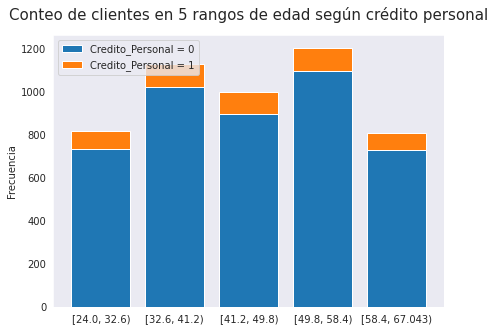

In [ ]:
vis_16 = plt.figure(figsize=(7, 5))
ax = vis_16.add_subplot()

plt1 = ax.bar(value_counts.index, value_counts[0], label='0')
plt2 = ax.bar(value_counts.index, value_counts[1], bottom=value_counts[0])

ax.set_ylabel('Frecuencia')
ax.set_title('Conteo de clientes en 5 rangos de edad según crédito personal', fontsize=15, pad=15);
plt.legend((plt1[0], plt2[0]), ('Credito_Personal = 0', 'Credito_Personal = 1'));

# Concluciones sobre análisis de datos

Pudimos concluir sobre la variabilidad y pocisión de los datos que no contamos con datos que se puedan considerar verdaderamente atípicos, si bien observamos que en nuestros valores máximos en gastos e ingresos tenemos poca frecuencia la disperción en ambas no es alta.

También pudimos establecer de manera inferencial que las características más importantes (Fetures) son los Gastos, Ingresos, y en un segundo término la educación, hipoteca y cuenta de ahorros o de cuenta de activos financieros mientras que el resto de características pueden pasar a un tercer termino

Del grupo de personas que aceptaron el crédito personal 281 no cuenta con:

*   Tarjetas de creidito de otras instituciones financieras
*   Cuenta de Ahorro
*   Cuenta de Activos Financieros

eso quiere decir que al menos 58% de los que tomaron el crédito, no cuentan con más recursos para afrontar sus gastos; no cuentan con suficientes ingresos para generar ahorro y no pueden invertir en activos financieros posiblemente por falta de recursos.

Gracias a la matriz de correlación sabemos que el adquirir un crédito personal tiene una cierta correlación con los gastos y los Ingreso; esto tiene mucha lógica debido a que también podemos observar que los ingresos y los gastos tiene una correlación positiva y gracias a graficación avanzada vemos que la mayoría de las personas que optaron por el crédito tienen un ingreso más alto que y que sus gatos por ende también son en promedio más altos.

por último pudimos observa que el valor de la hipoteca es en promedio más alta en aquellos clientes que tomaron el crédito personal y cuentan con una, que aquellos que no aceptaron

# Machine Learning
Ya hemos logrado encontrar muchos insights valisos de la informacion, ahora toca el turno de comenzar a responder la pregunta clave de nuestro cliente.

El Banco quiere saber con precisión cuantos clientes aceptaran el crédito personal en la siguiente promoción que se realizara. Es aqui donde te damos la bienvenida a nuestra tienda de Esferas de crsital... tal vez te hemos confundido un poco por que la verdad no estamos hablando de magia aunque si parece, estamos hablando de Machine Learning. 

Machine Learning es una subcategoria de AI que que permite a un sistema aprender de los datos en lugar de aprender por medio de programacion explicita, es un sistema complejo que mejora su respuesta con los datos que recibe de entrada 

Una de las grandes capacidadees de Machine Leraning es la posibilidad de hacer predeicciones y es por esto que te decimos que tenemos una tienda de esferas de cristal con la capacidad de hacer predeiciones basandonos en eventos ya ocurridos 

En el marketing esto resulta muy util dado que a partir de una promocion pudieramos inferir el exito que puedieramos obetener en las siguientes y incluso pudieramos inferir el existo de nuevas promociones cuando los productos o servicios tengan caracteristicas muy similares. 

Regresamos a la solucion de nuestro problema central y utilizaremos los datos que tenemos para entrenar una serie de Modelos de Machine Learnings


#Regresion Logistica

In [ ]:
df_lr = df.copy()

In [ ]:
Y = ['Credito_Personal']

X = ['Edad', 'Experiencia_Laboral', 'Ingresos', 'Codigo_Postal',
       'Dependientes', 'Gastos', 'Educación', 'Hipoteca', 
       'Activo_Financiero', 'Cuenta_de_Ahorros', 'Banca_Online',
       'Tarjetas_de_Credito']

In [ ]:
final_data_vars = df_lr.columns.values.tolist()

In [ ]:
final_data_vars

['ID',
 'Edad',
 'Experiencia_Laboral',
 'Ingresos',
 'Codigo_Postal',
 'Dependientes',
 'Gastos',
 'Educación',
 'Hipoteca',
 'Credito_Personal',
 'Activo_Financiero',
 'Cuenta_de_Ahorros',
 'Banca_Online',
 'Tarjetas_de_Credito']

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

Obtencion de las 5 caracteristicas mas importantes para predecir el valor de la variable credito personal. La obtencion de la importancia de las caracteristicas se realiza a traves de la utilizacion de feature selection y de LogisticRegression, las cuales se encuentran en la libreria de scikit-learn

In [ ]:
lr = LogisticRegression(max_iter = 100_000)

In [ ]:
rfe = RFE(lr, n_features_to_select = 5)
rfe = rfe.fit(df_lr[X], df_lr[Y].values.ravel())

In [ ]:
print(rfe.support_)

[False  True  True False  True False  True False False  True False False]


In [ ]:
print(rfe.ranking_)

[2 1 1 5 1 3 1 4 6 1 7 8]


Se obtiene el ranking de cada una de las caracteristicas

In [ ]:
z = zip(final_data_vars, rfe.support_, rfe.ranking_)

In [ ]:
list(z)

[('ID', False, 2),
 ('Edad', True, 1),
 ('Experiencia_Laboral', True, 1),
 ('Ingresos', False, 5),
 ('Codigo_Postal', True, 1),
 ('Dependientes', False, 3),
 ('Gastos', True, 1),
 ('Educación', False, 4),
 ('Hipoteca', False, 6),
 ('Credito_Personal', True, 1),
 ('Activo_Financiero', False, 7),
 ('Cuenta_de_Ahorros', False, 8)]

Las caracteristicas importantes de la funcion featrures selection que toma el modelo de regresion Logistica Edad, Experiencia Laboral, Codigo Postal, Gastos

---



In [ ]:
from sklearn import linear_model

#Overview del modelo de regresion logistica

In [ ]:
X = df_lr[['Edad', 'Experiencia_Laboral', 'Ingresos', 'Codigo_Postal',
       'Dependientes', 'Gastos', 'Educación', 'Hipoteca', 
       'Activo_Financiero', 'Cuenta_de_Ahorros', 'Banca_Online', 'Tarjetas_de_Credito']]

Y = df_lr['Credito_Personal']

In [ ]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X, Y)

LogisticRegression()

Obtenemos el acuracy

In [ ]:
logit_model.score(X, Y)

0.904607922392886

Obtenemos la media -1 para saber la vealides de nuestro modelo

In [ ]:
 1-Y.mean()

0.9029911075181891

Obtenemos el peso de las variables predicotas en la formula

In [ ]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

0                          1
0                  Edad  [-0.00022608495961592282]
1   Experiencia_Laboral  [-0.00021489231337385272]
2              Ingresos      [0.03262076077361184]
3         Codigo_Postal   [-6.487416222801523e-05]
4          Dependientes   [0.00014948478171244634]
5                Gastos     [0.011077673165347102]
6             Educación   [0.00022268711452955707]
7              Hipoteca    [0.0008224130629561482]
8     Activo_Financiero    [1.220641457975627e-05]
9     Cuenta_de_Ahorros   [0.00012066895384502707]
10         Banca_Online    [4.304984637941514e-06]
11  Tarjetas_de_Credito    [2.967442649322814e-06]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
scores = cross_val_score(linear_model.LogisticRegression(max_iter = 100000), X, Y, scoring="accuracy", cv=10)

In [ ]:
scores

array([0.94545455, 0.9030303 , 0.9010101 , 0.92727273, 0.92525253,
       0.91111111, 0.90707071, 0.93535354, 0.951417  , 0.89068826])

In [ ]:
scores.mean()

0.9197660818713451

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [ ]:
lm = linear_model.LogisticRegression(max_iter = 100_000)
lm.fit(X_train, Y_train)

LogisticRegression(max_iter=100000)

In [ ]:
probs = lm.predict_proba(X_test)

In [ ]:
probs.shape

(1485, 2)

In [ ]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0] >= threshold, 1, 0)
prob_df["actual"] = list(Y_test)
prob_df

0  prediction  actual
0     0.200702           1       0
1     0.000424           0       0
2     0.019176           0       1
3     0.006160           0       0
4     0.003096           0       0
...        ...         ...     ...
1480  0.010954           0       0
1481  0.355889           1       0
1482  0.000028           0       0
1483  0.015704           0       0
1484  0.015472           0       0

[1485 rows x 3 columns]

In [ ]:
threshold = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]

sensitivities = [1]
especifities_1 = [1]

for t in threshold:

    prob_df["prediction"] = np.where(prob_df[0] >= t, 1, 0)
    prob_df["actual"] = list(Y_test)
    prob_df.head()

    cfm = pd.crosstab(prob_df.prediction, prob_df.actual)

    TN = cfm[0][0]
    TP = cfm[1][1]
    FP = cfm[0][1]
    FN = cfm[1][0]

    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)
    
sensitivities.append(0)
especifities_1.append(0)

In [ ]:
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))

    acc = calcularAccuracy(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    print("Precision:"+str(acc)+"%")
    print("Sensibilidad:"+str(sen)+"%")
    print("Especificidad:"+str(spec)+"%")

In [ ]:
evaluar(prob_df.actual, prob_df.prediction)

[[1310   27]
 [  58   90]]
True positives: 90
True negatives: 1310
False positives: 27
False negative: 58
Precision:94.27609427609428%
Sensibilidad:60.810810810810814%
Especificidad:97.98055347793567%


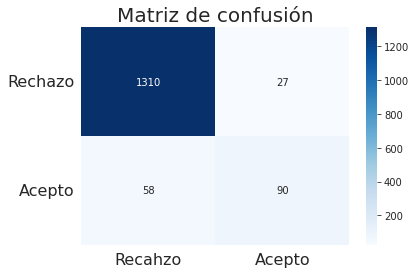

In [ ]:
cm_rl = confusion_matrix(prob_df.actual, prob_df.prediction)
sns.heatmap(cm_rl, annot= True, cmap = 'Blues', fmt = 'd') 
plt.title('Matriz de confusión' , fontsize = 20)
plt.xticks(np.arange(2)+0.5, ["Recahzo","Acepto"], fontsize=16, rotation = 0, )
plt.yticks(np.arange(2)+0.5, ["Rechazo","Acepto"], fontsize=16, rotation = 0);

Primeramente se realiza un analisis exploratorio y un cruce de variables para entender que tanto influyen las caracteristicas en que la persona tome o no un credito personal. Se obtiene la importancia de cada caracteristica en cuestion de cuanto aporta a expresar los resultados del modelo utilizando feature selection. Se utilizan las 5 mejores caracteristicas y se entrena un modelo de regresion logistica de scikitlearn. Posteriormente a esto se toman todas las caracteristicas para entrenar un modelo de regresion logistica y al momento de evaluar la matriz de confusion notamos que tiene buenos resultados pero un punto a considerar como area de oportunidad es que varias predicciones (aproximadamente el 10%) que hace como positivas en realidad son falsas, esto nos propone que de un 100 porciento de esfuerzos que se realicen para lograr el objetivo, en el peor de los casos, vamos a estar enfocando un 10% de mala manera, lo que nos otorga oportunidad para mejorar el modelo sobre esa metrica. Posterior a esto se analizan diferentes thresholds para el modelo y los resultados se muestran en la grafica de la curva ROC. En la grafica podemos apreciar que el punto mas optimo o en el cual se consigue el mejor trade-off se logra cuando el threshold es de aproximadamente  0.15.

#Naive Bayes

In [ ]:
Y = df['Credito_Personal']

X = df[['Codigo_Postal', 'Edad', 'Experiencia_Laboral', 'Ingresos',
        'Dependientes', 'Gastos', 'Educación', 'Hipoteca', 
       'Activo_Financiero', 'Cuenta_de_Ahorros', 'Banca_Online',
       'Tarjetas_de_Credito']]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, Y_train)
Y_pred_nb = NaiveBayes.predict(X_test)

In [ ]:
evaluar(Y_test, Y_pred_nb)

[[1234  103]
 [  59   89]]
True positives: 89
True negatives: 1234
False positives: 103
False negative: 59
Precision:89.0909090909091%
Sensibilidad:60.13513513513513%
Especificidad:92.29618548990277%


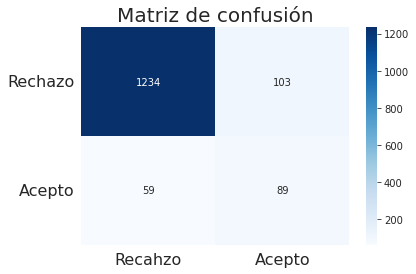

In [ ]:
cm_nb = confusion_matrix(Y_test, Y_pred_nb)
sns.heatmap(cm_nb, annot= True, cmap = 'Blues', fmt = 'd') 
plt.title('Matriz de confusión' , fontsize = 20)
plt.xticks(np.arange(2)+0.5, ["Recahzo","Acepto"], fontsize=16, rotation = 0, )
plt.yticks(np.arange(2)+0.5, ["Rechazo","Acepto"], fontsize=16, rotation = 0);

##Validación cruzada

In [ ]:
scores_nb = cross_val_score(GaussianNB(), X, Y, scoring="accuracy", cv=10)
scores_nb

array([0.8969697 , 0.86868687, 0.8969697 , 0.87272727, 0.9030303 ,
       0.88282828, 0.89494949, 0.88686869, 0.88866397, 0.88461538])

In [ ]:
scores_nb.mean()

0.8876309655257024

#Máquina de soporte vectorial (SVC)

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

SupportVectorMachine = SVC()
SupportVectorMachine.fit(X_train, Y_train) 
Y_pred_svm = SupportVectorMachine.predict(X_test)

In [ ]:
evaluar(Y_test, Y_pred_svm)

[[1337    0]
 [ 148    0]]
True positives: 0
True negatives: 1337
False positives: 0
False negative: 148
Precision:90.03367003367003%
Sensibilidad:0.0%
Especificidad:100.0%


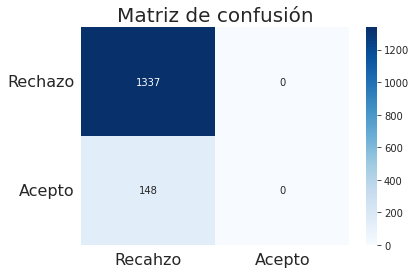

In [ ]:
cm_svc = confusion_matrix(Y_test, Y_pred_svm)
sns.heatmap(cm_svc, annot= True, cmap = 'Blues', fmt = 'd') 
plt.title('Matriz de confusión' , fontsize = 20)
plt.xticks(np.arange(2)+0.5, ["Recahzo","Acepto"], fontsize=16, rotation = 0, )
plt.yticks(np.arange(2)+0.5, ["Rechazo","Acepto"], fontsize=16, rotation = 0);

##Validación cruzada

In [ ]:
scores_svc = cross_val_score(SVC(), X, Y, scoring="accuracy", cv=10)
scores_svc

array([0.9030303 , 0.9030303 , 0.9030303 , 0.9030303 , 0.9030303 ,
       0.9030303 , 0.9030303 , 0.9030303 , 0.90283401, 0.90283401])

In [ ]:
scores_svc.mean()

0.9029910440436757

#Máquina de soporte vectorial lineal (Linear SVC)

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
svm_clf = Pipeline([("scaler", StandardScaler()),("linear_svc", LinearSVC(C=1, loss="hinge", max_iter=100000)),])
svm_clf.fit(X, Y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', max_iter=100000))])

In [ ]:
Y_pred_lsvm = svm_clf.predict(X_test)

In [ ]:
evaluar(Y_test, Y_pred_lsvm)

[[1324   13]
 [  55   93]]
True positives: 93
True negatives: 1324
False positives: 13
False negative: 55
Precision:95.42087542087542%
Sensibilidad:62.83783783783784%
Especificidad:99.02767389678384%


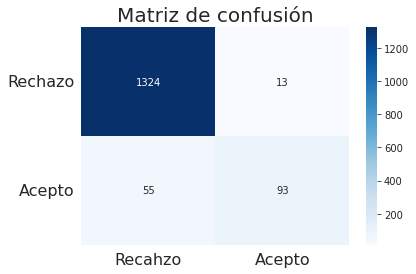

In [ ]:
cm_lsvm = confusion_matrix(Y_test, Y_pred_lsvm)
sns.heatmap(cm_lsvm, annot= True, cmap = 'Blues', fmt = 'd') 
plt.title('Matriz de confusión' , fontsize = 20)
plt.xticks(np.arange(2)+0.5, ["Recahzo","Acepto"], fontsize=16, rotation = 0, )
plt.yticks(np.arange(2)+0.5, ["Rechazo","Acepto"], fontsize=16, rotation = 0);

##Validación cruzada

In [ ]:
scores_svm_clf = cross_val_score(svm_clf, X, Y, scoring="accuracy", cv=10)
scores_svm_clf

array([0.95555556, 0.94949495, 0.95555556, 0.94343434, 0.95959596,
       0.95151515, 0.95555556, 0.93737374, 0.96356275, 0.94331984])

In [ ]:
scores_svm_clf.mean()

0.9514963399173926

# Random Forest

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y, test_size = 0.30, random_state = 42)

In [ ]:
bosque = forest(n_estimators=200, random_state = 42)

In [ ]:
bosque.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
Y_pred_rf = bosque.predict(X_test)

In [ ]:
feature_importance_df = pd.DataFrame({"Caracteristica": list(X.columns), "importancia": bosque.feature_importances_}).sort_values("importancia", ascending=False)
feature_importance_df

Caracteristica  importancia
3              Ingresos     0.327941
6             Educación     0.179373
5                Gastos     0.166443
4          Dependientes     0.104131
9     Cuenta_de_Ahorros     0.056672
7              Hipoteca     0.039185
0         Codigo_Postal     0.037731
2   Experiencia_Laboral     0.034857
1                  Edad     0.034472
11  Tarjetas_de_Credito     0.008187
10         Banca_Online     0.007251
8     Activo_Financiero     0.003758

In [ ]:
evaluar(Y_test, Y_pred_rf)

[[1336    5]
 [  16  128]]
True positives: 128
True negatives: 1336
False positives: 5
False negative: 16
Precision:98.58585858585859%
Sensibilidad:88.88888888888889%
Especificidad:99.62714392244594%


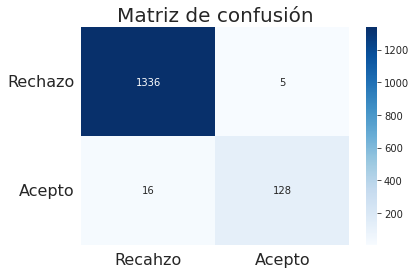

In [ ]:
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
sns.heatmap(cm_rf, annot= True, cmap = 'Blues', fmt = 'd') 
plt.title('Matriz de confusión' , fontsize = 20)
plt.xticks(np.arange(2)+0.5, ["Recahzo","Acepto"], fontsize=16, rotation = 0,)
plt.yticks(np.arange(2)+0.5, ["Rechazo","Acepto"], fontsize=16, rotation = 0);

##Validación cruzada

In [ ]:
scores_bos = cross_val_score(bosque, X, Y, scoring="accuracy", cv=10)
scores_bos

array([0.98585859, 0.98787879, 0.98383838, 0.98383838, 0.98585859,
       0.98383838, 0.99393939, 0.99191919, 0.98785425, 0.98987854])

In [ ]:
scores_bos.mean()

0.9874702490491964

In [ ]:
def plot_roc(X_test,Y_test,models):
    
    #models object should be a dictionary comprising of name of model and the model object
    for name,model in models.items():

        if hasattr(model,'decision_function'):
            probs=model.decision_function(X_test) 
        elif hasattr(model,'predict_proba'):
            probs=model.predict_proba(X_test)[:,1]
        fpr,tpr,threshold=roc_curve(Y_test,probs)
        roc_auc=auc(fpr,tpr)
        print('ROC AUC=%0.2f'%roc_auc)
        plt.plot(fpr,tpr,label='%s (AUC=%0.2f)'%(name,roc_auc))
        
    plt.legend(loc='lower right')
    plt.plot([0,1.05],[0,1],'b--')
    plt.xlim([0,1.10])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

ROC AUC=0.96
ROC AUC=1.00
ROC AUC=0.92
ROC AUC=0.67
ROC AUC=0.49

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


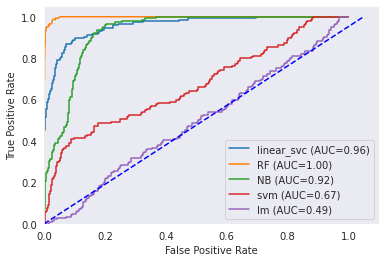

In [ ]:
models={'linear_svc':svm_clf,'RF':bosque, 'NB':NaiveBayes, 'svm':SupportVectorMachine, 'lm':lm}
plot_roc(X_test,Y_test,models);